### Importing the necessary libraries for the data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

## Reading the dataset

In [2]:
dataset = pd.read_excel(r'C:\Users\LENOVO\Documents\Post Graduation\internship\Project 1\Customer_retention_dataset\customer_retention_dataset.xlsx')
dataset.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


### using set option to include all the columns in the dataframe

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

### There are 269 rows and 71 columns to the dataset

### Reviewing the dataset features

In [5]:
dataset.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

### Getting to know the population with whom the survey was made

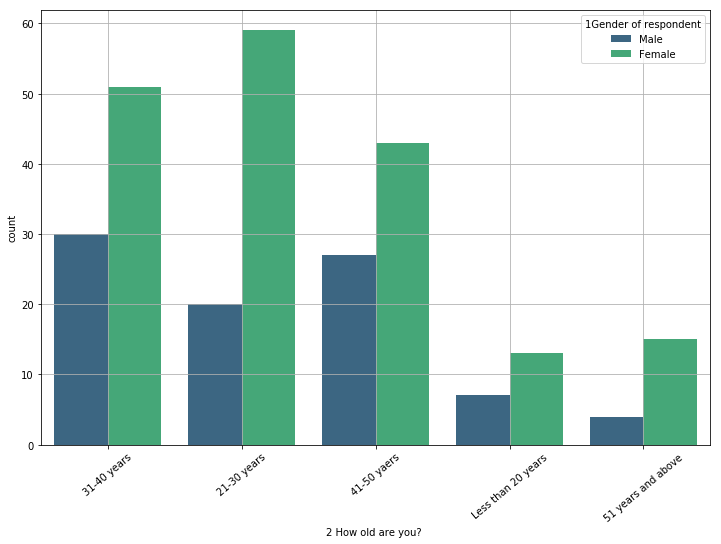

In [28]:
plt.figure(figsize = (12,8))
sns.countplot(x=dataset['2 How old are you? '], hue = dataset['1Gender of respondent'], palette = 'viridis')
plt.xticks(rotation = 40)
plt.grid()
plt.show()

### As per the above plot, I can see that most of the participants are of the age 21 to 50, where we received highest number of the responses from the people whose age is 31 to 40.

#### Out of the whole population I can say that, female participants were the highest number of respondents

### Let's check, from which city the participants are from

In [7]:
print(dataset['3 Which city do you shop online from?'].value_counts())

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64


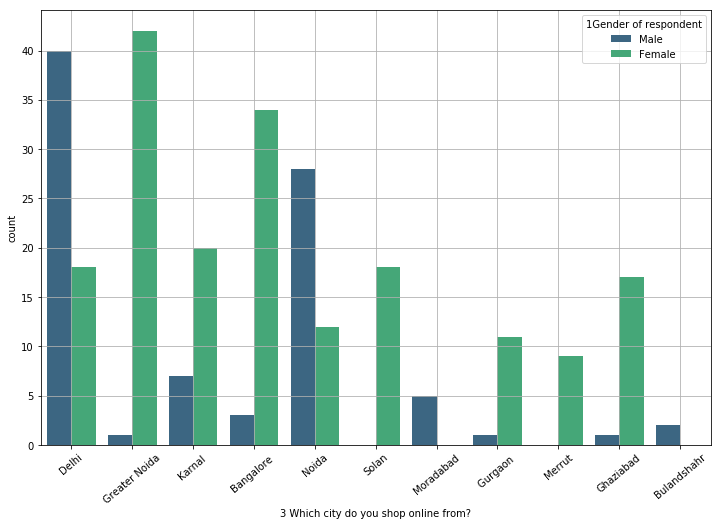

In [29]:
plt.figure(figsize = (12,8))
sns.countplot(x=dataset['3 Which city do you shop online from?'],hue = dataset['1Gender of respondent'], palette = 'viridis')
plt.xticks(rotation = 40)
plt.grid()
plt.show()

### Upon reviewing the above graph, I can see that the highest participant was from Delhi with 58 count. Out of 58, 40 were male participants and 18 were female participants

##### Further, I can also see that the second highest participant were from Greater Noida , with 42 female participants and 1 male participants

### Checking if there is any relation between the length of time on online purchase v/s the number of times people made online purchase in the past year

In [9]:
dataset['5 Since How Long You are Shopping Online ?'].value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

In [10]:
dataset['6 How many times you have made an online purchase in the past 1 year?'].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

In [11]:
#pip install -U seaborn

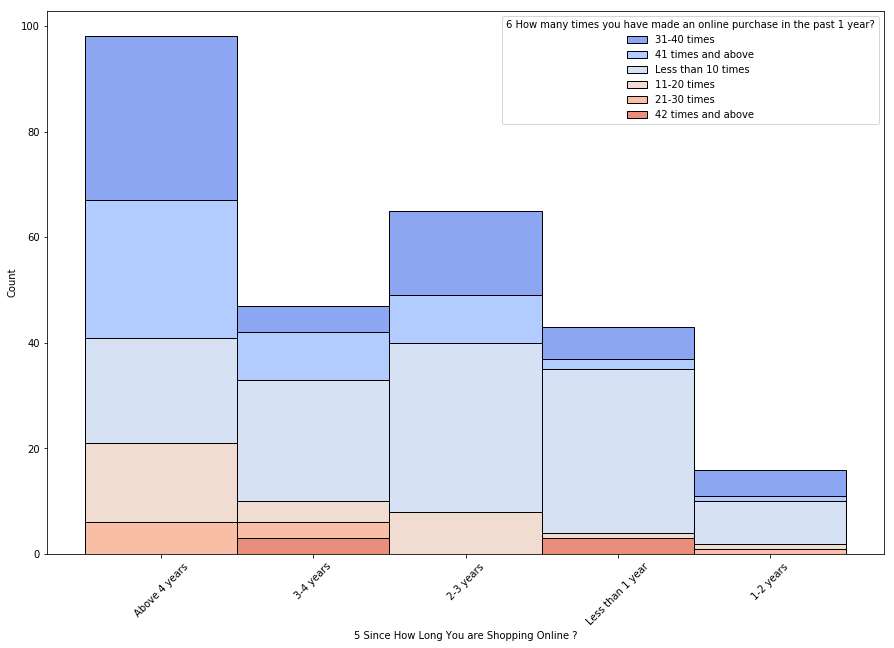

In [15]:
plt.figure(figsize = (15,10))
sns.histplot(x = '5 Since How Long You are Shopping Online ?',hue= '6 How many times you have made an online purchase in the past 1 year?', data = dataset,
              multiple="stack", palette = 'coolwarm')
plt.xticks(rotation = 45)
plt.show()

## Conclusion

1. We can clearly see that the number of times people order per year increases with increse in the length of shopping experience.
2. If we check for the people who were shopping since 1-2 years there was lesser number of orders overall and most of them ordered less than 10 times.
3. Where as the people who were shopping from more than 4 years ago, most of the people order more than 30 times a year.

### Here I would like to understand why people stuck to online shopping for more than 4 years, and why people started shopping online recently.

### Is it because of 'Online shopping gives monetary benefit and discounts'`

In [17]:
cross = pd.crosstab(index = dataset['5 Since How Long You are Shopping Online ?'],columns = dataset['30 Online shopping gives monetary benefit and discounts'])
cr = pd.DataFrame(cross)
cr

30 Online shopping gives monetary benefit and discounts,Agree (4),Dis-agree (2),Strongly agree (5),Strongly disagree (1),indifferent (3)
5 Since How Long You are Shopping Online ?,,,,,
1-2 years,2,0,9,0,5
2-3 years,18,1,34,3,9
3-4 years,16,2,20,6,3
Above 4 years,24,8,26,8,32
Less than 1 year,25,0,16,1,1


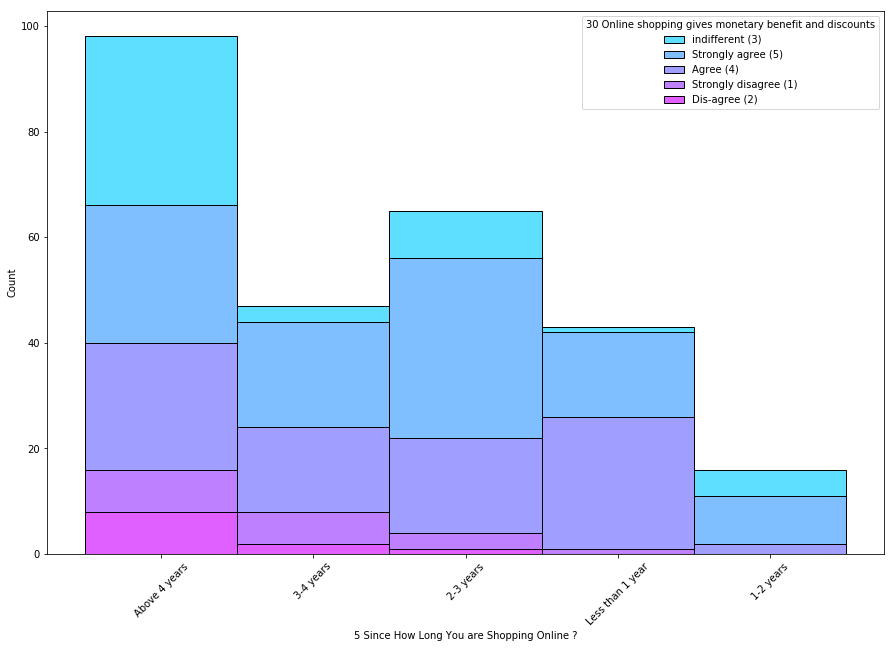

In [21]:
plt.figure(figsize = (15,10))
sns.histplot(hue = dataset['30 Online shopping gives monetary benefit and discounts'], x = dataset['5 Since How Long You are Shopping Online ?'],
             multiple = 'stack', palette = 'cool')
plt.xticks(rotation = 45)
plt.show()

## Conclusion:

1. More number of people who were shopping from 2-3 years Strongly agree that shopping online gives benefit of discounts.
2. People who were shopping from 1-2 years doesn't dis-agree at all that the online shopping gives discounts.
3. Also as the number of shopping year progresses the people who disagree rises slightly. According to our analysis 16 people who shopped above 4 years doesn't agree that shopping online gives benefit of discounts.

### Let's check te distribution of the retailers used for shopping online

In [24]:
dataset['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64

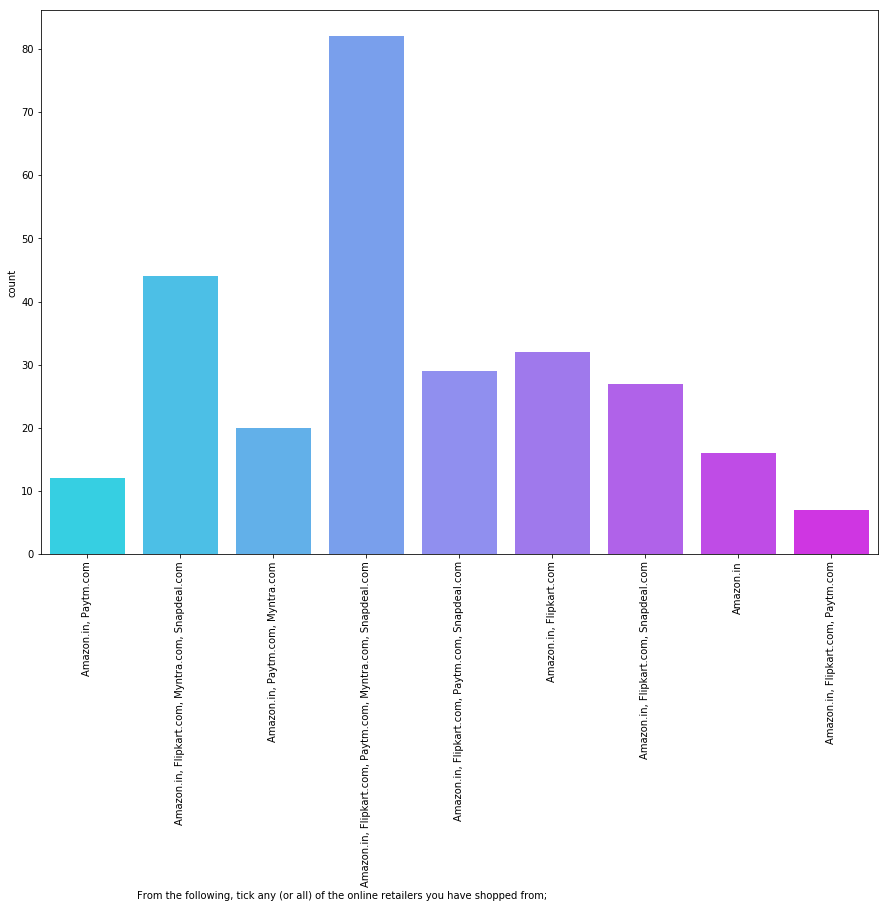

In [27]:
plt.figure(figsize = (15,10))
sns.countplot( x = dataset['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '],
             palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

### Conclusion:

1. I can see that most of the people shopped from Amazon, Flipkart, paytm, myntra and Snapdeal.
2. I can also see that everyone in the population has shopped from Amazon.
3. Further, almost everyone used Flipkart for shopping.
4. Myntra and Snapdeal isn't much popular among the population because only few subset of participants used these website for shopping

### Let's see what device people used to shop online and does the device used affect the website recommendation recommendation

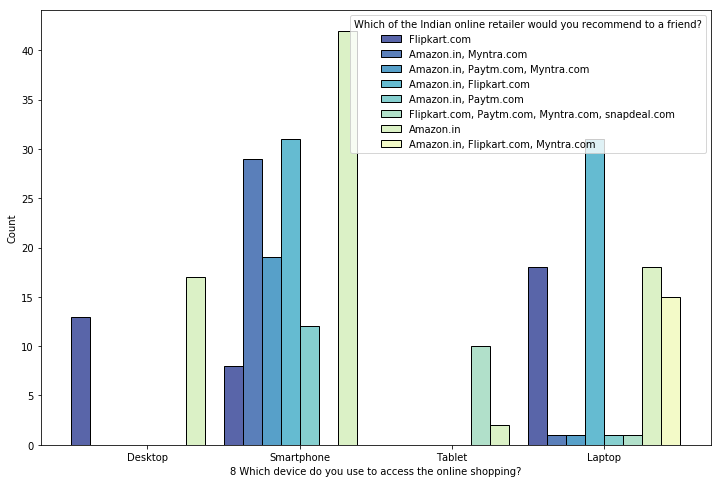

In [54]:
plt.figure(figsize = (12,8))
sns.histplot(x = dataset['8 Which device do you use to access the online shopping?'],
             hue = dataset['Which of the Indian online retailer would you recommend to a friend?'], multiple = 'dodge',palette = 'YlGnBu_r')

### Conclusion

1. From the above plot we can clearly see that the device used for shopping did have some effects on website recommendations, where in the people who shopped from Smartphone used all the websites to shop.
2. The people who used Desktop recommended only Flipkart and Amazon
3. people who used tablets participated majorly on Amazon on Flipkart, while other websites were also used

### From all the above analysis, I can clearly say that almost all the features on the dataset has contributed to one or the other parameter. therefore it is better to look at the distribution of the dataset and their categories

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64


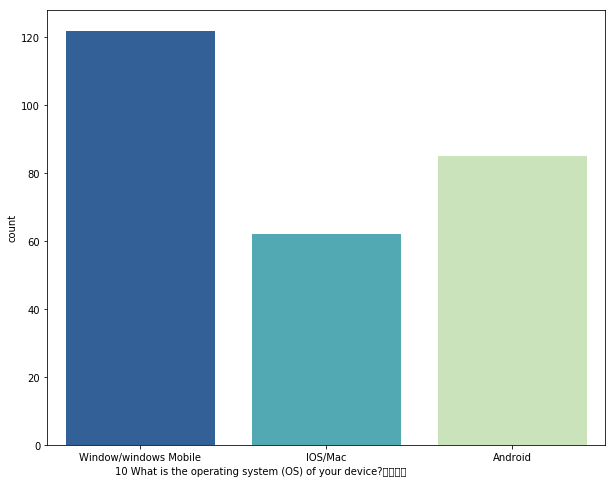

------------------------------------------------------------------------------------------------------------------------------------------------------
Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64


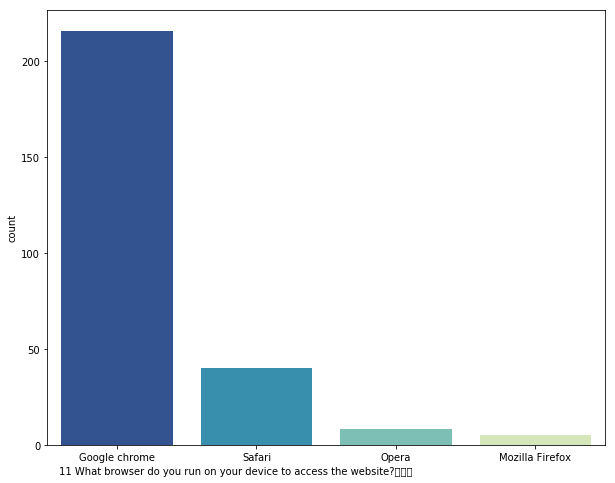

------------------------------------------------------------------------------------------------------------------------------------------------------
Search Engine        230
Content Marketing     20
Display Adverts       19
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , dtype: int64


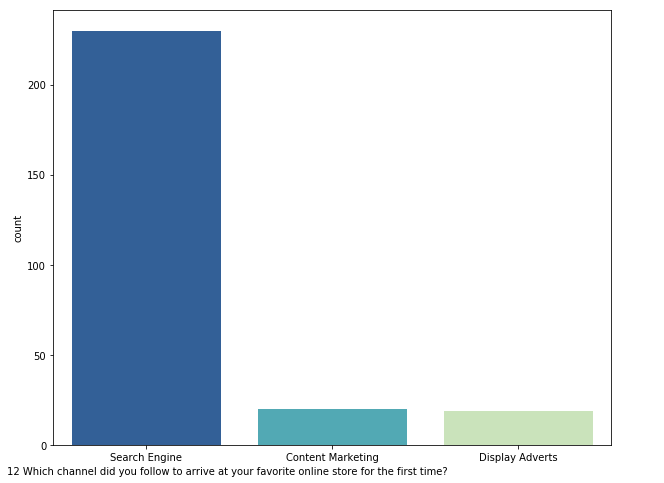

------------------------------------------------------------------------------------------------------------------------------------------------------
Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   , dtype: int64


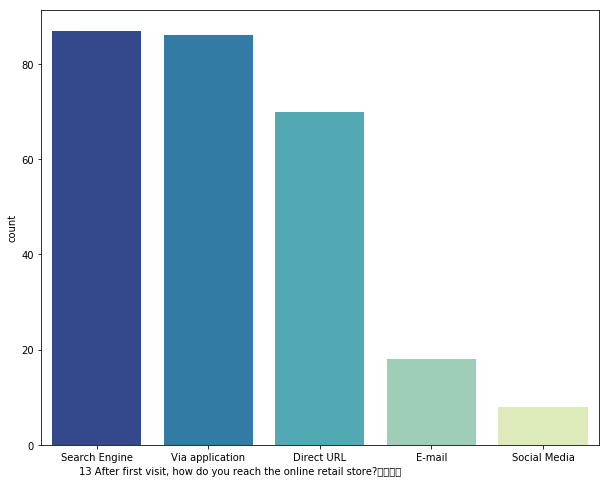

------------------------------------------------------------------------------------------------------------------------------------------------------
more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: int64


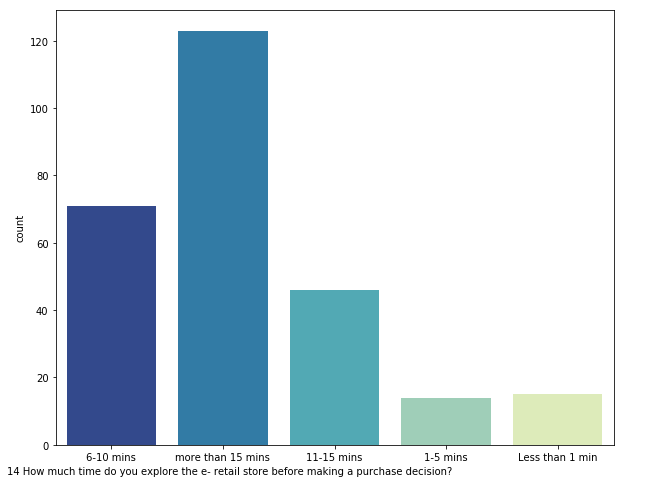

------------------------------------------------------------------------------------------------------------------------------------------------------
Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64


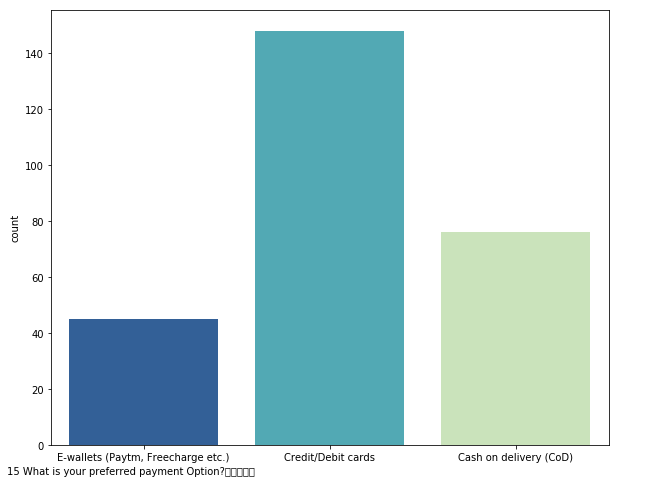

------------------------------------------------------------------------------------------------------------------------------------------------------
Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: 16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   , dtype: int64


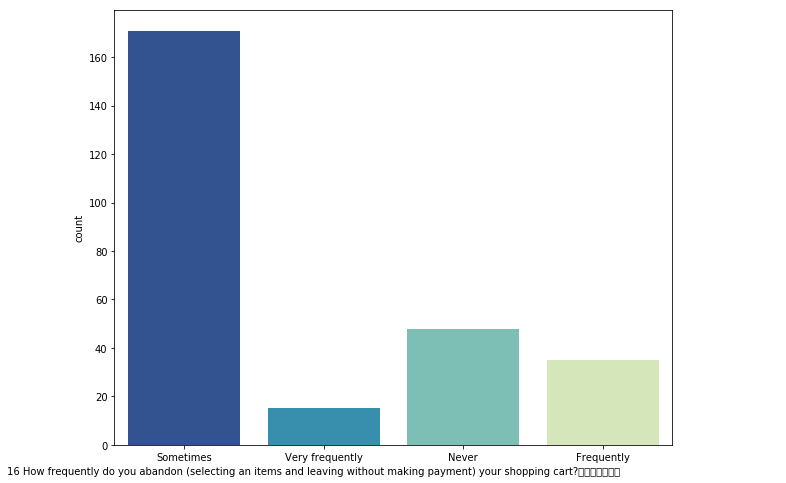

------------------------------------------------------------------------------------------------------------------------------------------------------
Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64


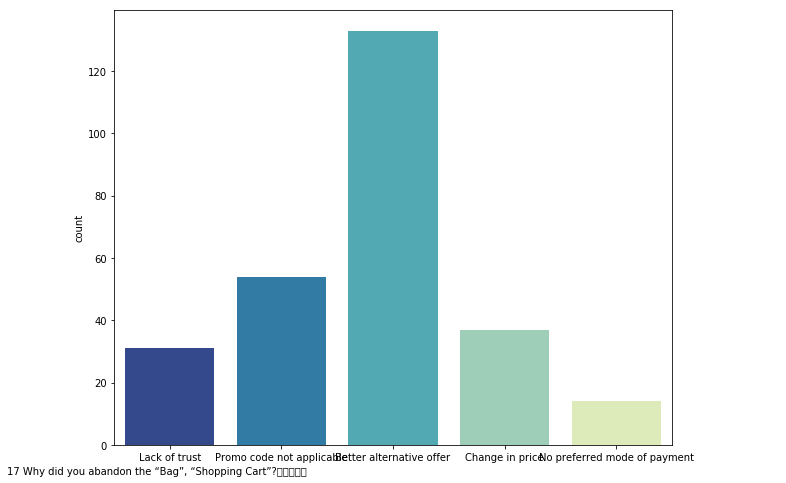

------------------------------------------------------------------------------------------------------------------------------------------------------


In [53]:
for col in dataset.iloc[:,9:17]:
    print(dataset[col].value_counts())
    plt.figure(figsize = (10,8))
    sns.countplot(x =dataset[col], palette = 'YlGnBu_r')
    plt.show()
    print('-----'*30)

### Conclusion

1. The first parameter ' The operating system used to shop on e-commerce websites clearly shows us that majority of the people used Windows operating system, followed by Android and IOS

2. Further, when it comes to the browser used to shop. Majority of the buyers used google chrome

3. For the first time of the shopping, Almost every one searched for website using search engine, and from the previous analysis we can see that every recommendation had Amazon, flipkart in it. This shows the popularity of these websites

4. After the first visit, out of 230 people who used search engine, 86 buyers switched to application, 87 buyers still used search engine, 70 buyers saved the URL for further use and others were using email and social media

5. Once they are inside the website, around 123 buyers spent more than 15 min before making a purchase decision, 71 buyers spent 6-10 mins, 46 buyers spent 11-15 mins and so on

6. Out of these buyers, more than 50 % of the population used credit/debit cards, followed by Cash on delivery and E-wallets

7. When we look at the trend of buyers who abandoned after adding the items in the cart, we can see that around 50 people abandoned the cart frequently without making a purchase, around 171 people abandoned the cart sometimes and rest of them never abandoned the cart

8. Further, when we are looking at the reasons to abandon the cart, around 50%(133 count) of the population said that they found a better offer, 54 buyers said that the promo codes weren't applicable, 37 buyers reported the change in price by the time they were about to purchase.

### The above details are the behaviour of the buyers when it comes to online shopping

### Let's check the factors about the websites that influence the buying decision

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: 18 The content on the website must be easy to read and understand, dtype: int64


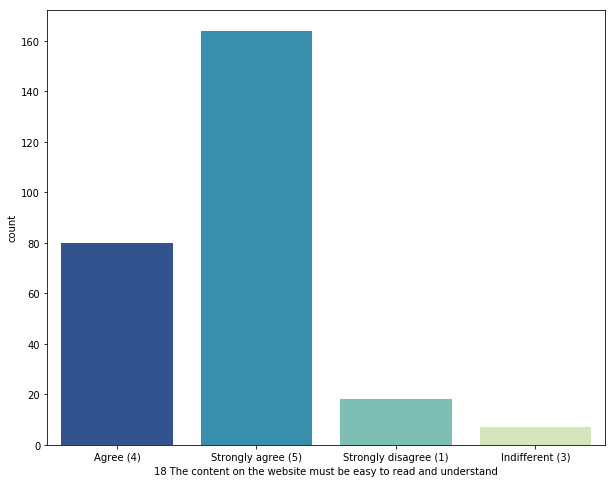

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64


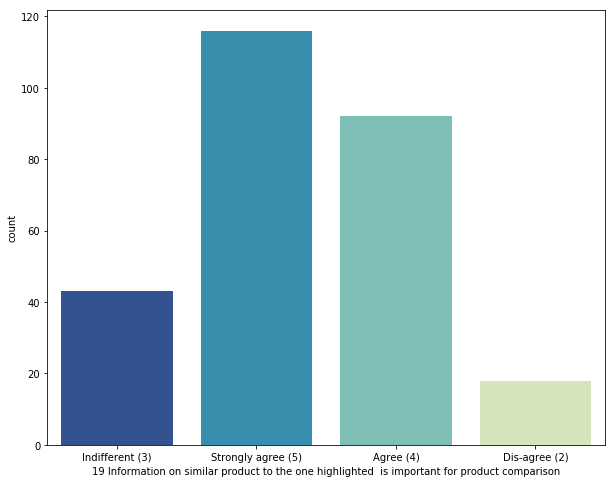

------------------------------------------------------------------------------------------------------------------------------------------------------
Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64


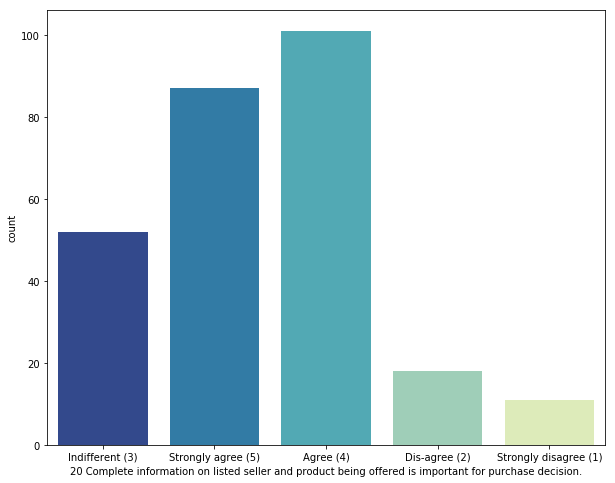

------------------------------------------------------------------------------------------------------------------------------------------------------
Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64


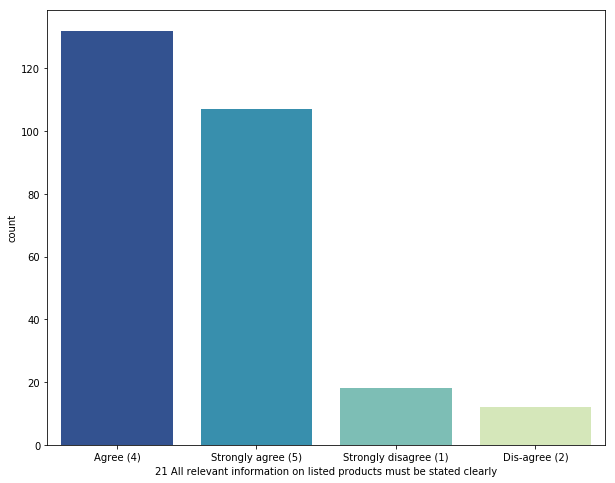

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: 22 Ease of navigation in website, dtype: int64


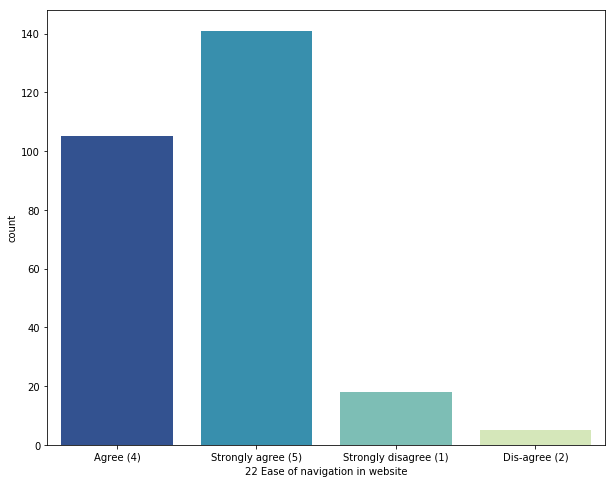

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Strongly disagree (1)     12
Indifferent (3)           12
Name: 23 Loading and processing speed, dtype: int64


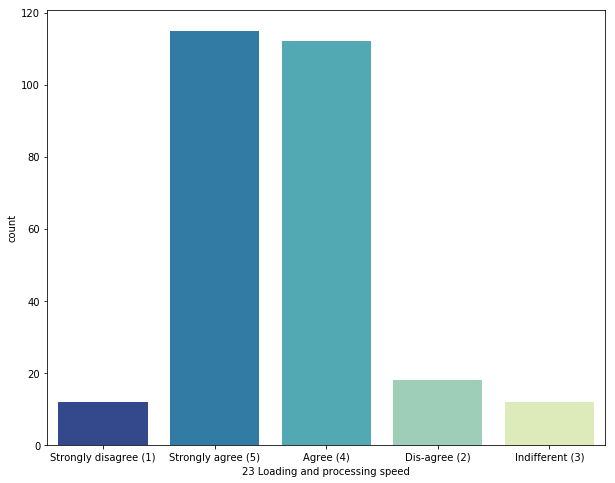

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: 24 User friendly Interface of the website, dtype: int64


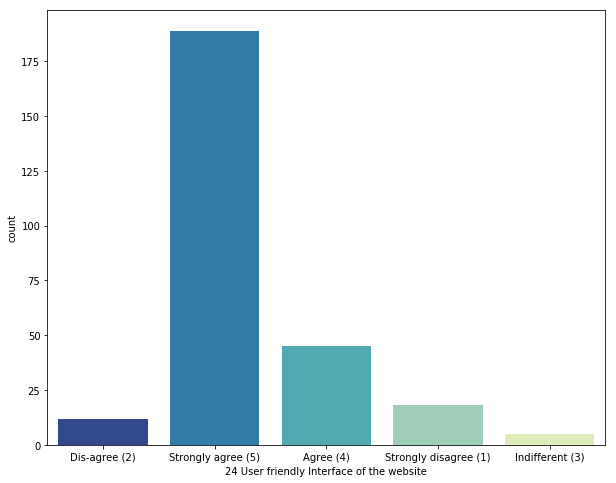

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: 25 Convenient Payment methods, dtype: int64


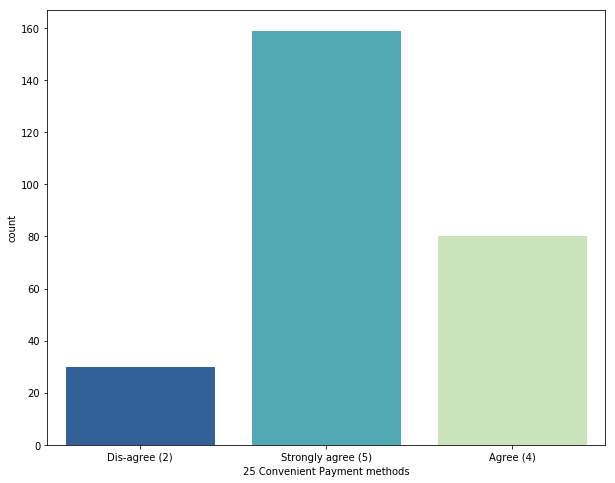

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64


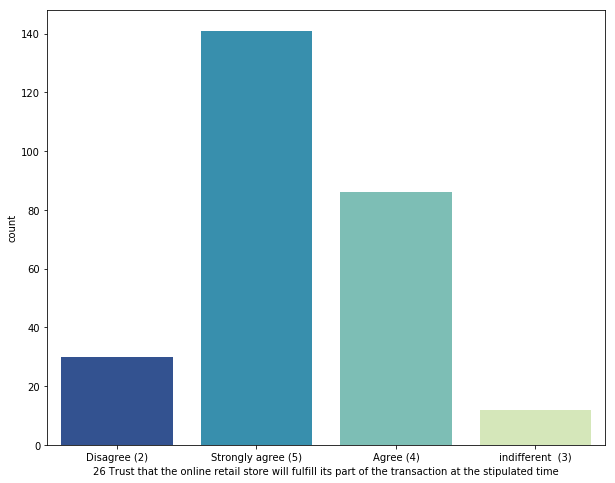

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64


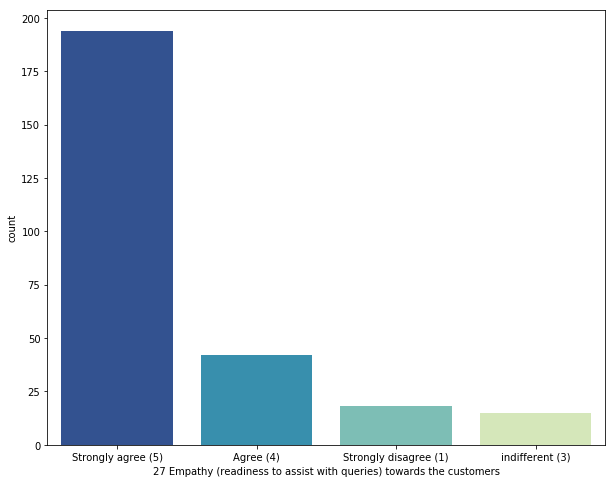

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64


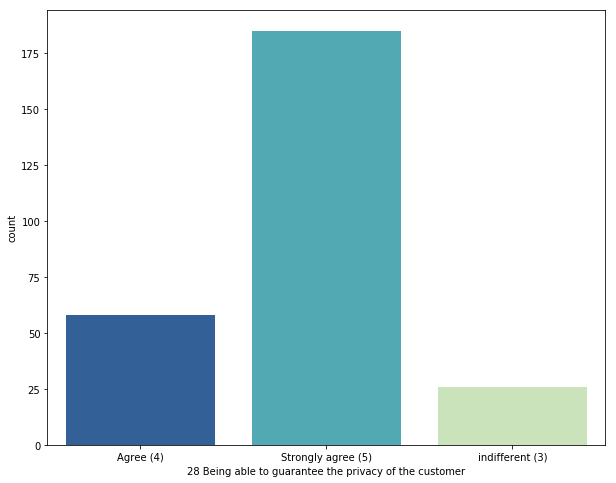

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64


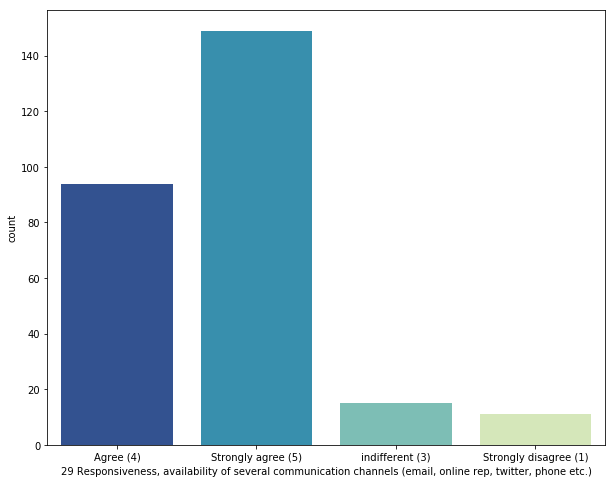

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: 30 Online shopping gives monetary benefit and discounts, dtype: int64


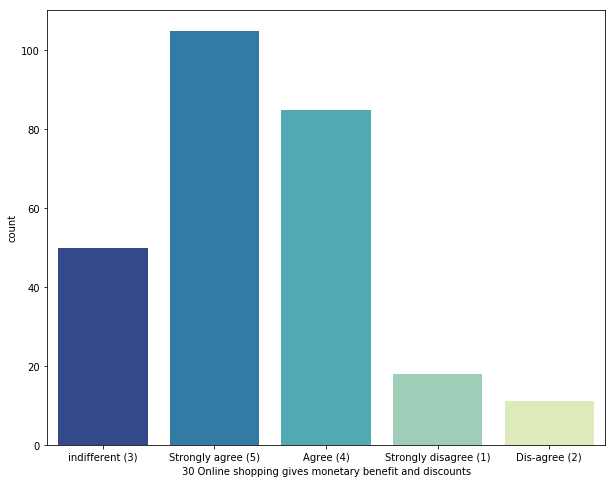

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: 31 Enjoyment is derived from shopping online, dtype: int64


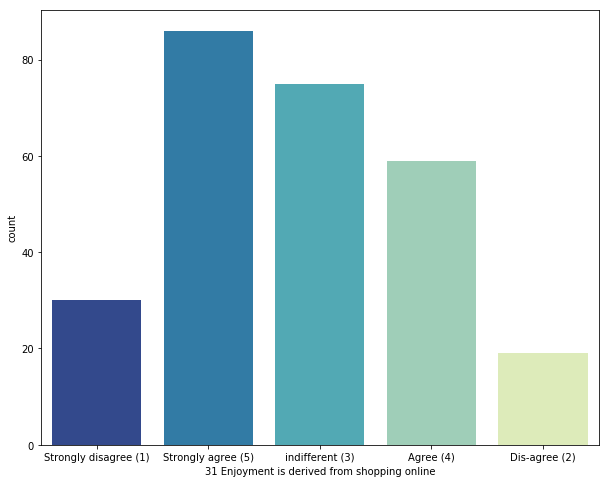

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: 32 Shopping online is convenient and flexible, dtype: int64


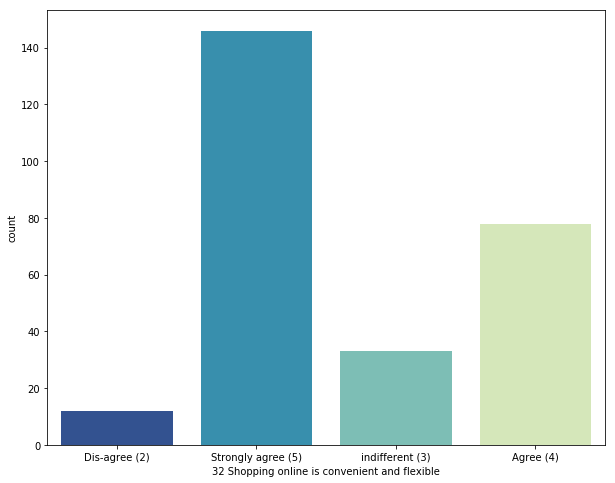

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64


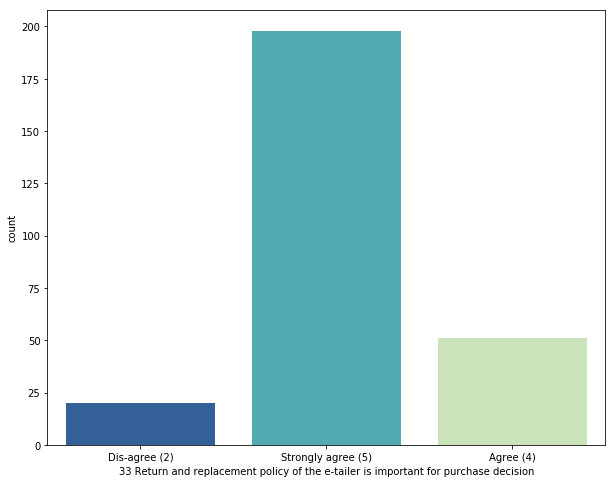

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)       115
Agree (4)                 64
indifferent (3)           64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: int64


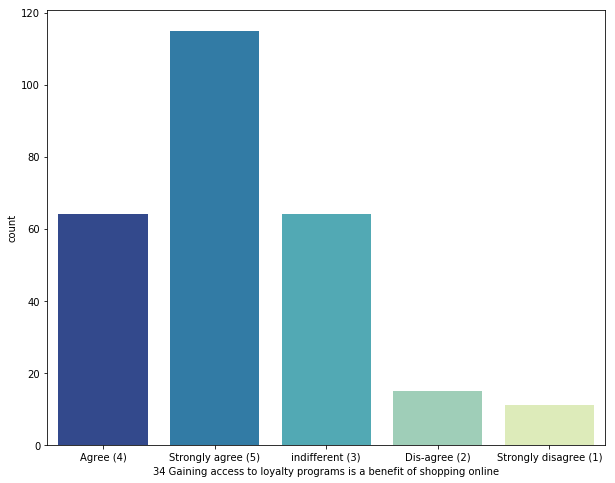

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: int64


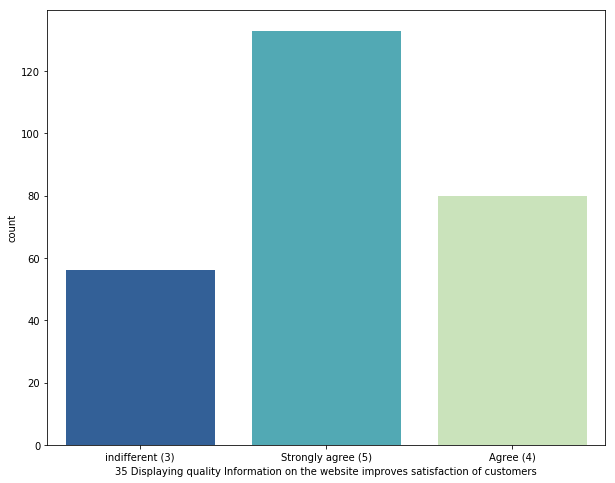

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: int64


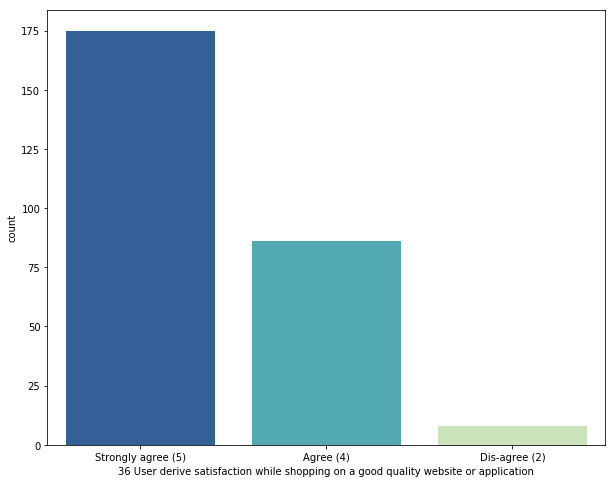

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64


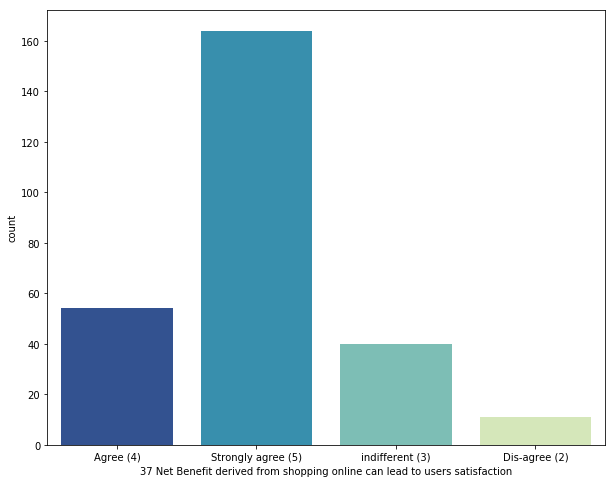

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: 38 User satisfaction cannot exist without trust, dtype: int64


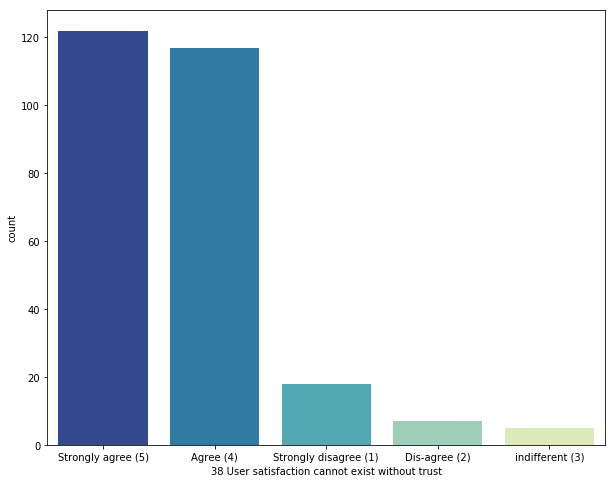

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: 39 Offering a wide variety of listed product in several category, dtype: int64


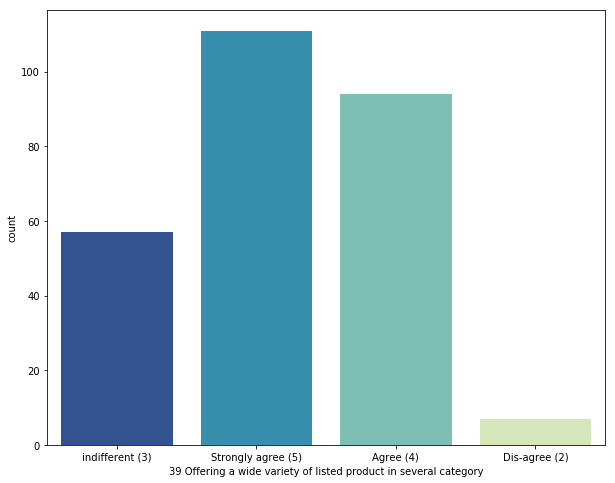

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: 40 Provision of complete and relevant product information, dtype: int64


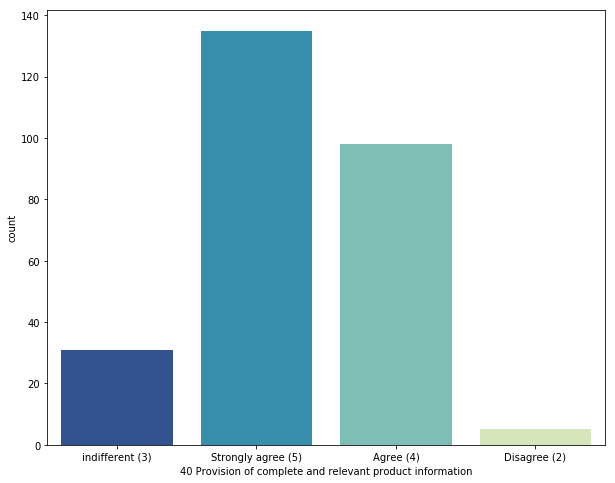

------------------------------------------------------------------------------------------------------------------------------------------------------
Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: 41 Monetary savings, dtype: int64


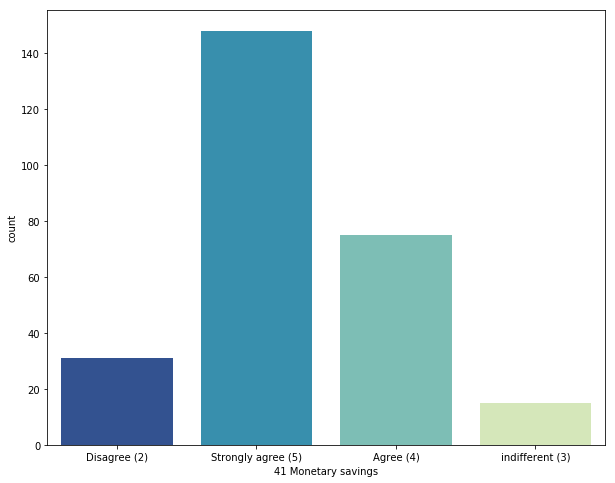

------------------------------------------------------------------------------------------------------------------------------------------------------
Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: 42 The Convenience of patronizing the online retailer, dtype: int64


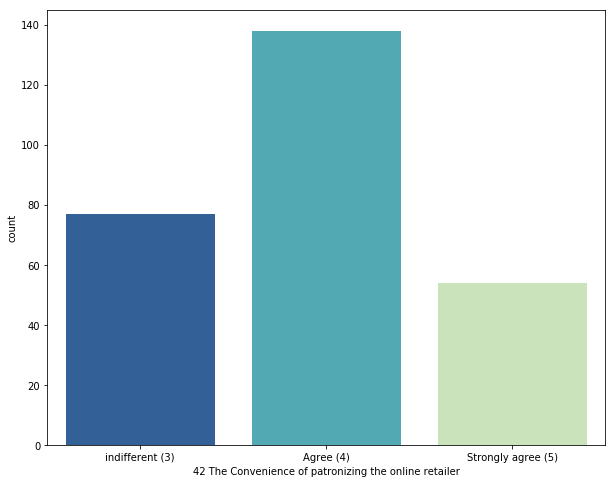

------------------------------------------------------------------------------------------------------------------------------------------------------
Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: 43 Shopping on the website gives you the sense of adventure, dtype: int64


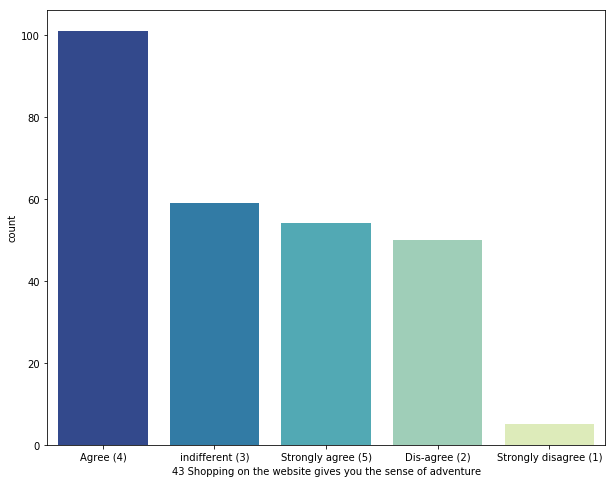

------------------------------------------------------------------------------------------------------------------------------------------------------
indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: 44 Shopping on your preferred e-tailer enhances your social status, dtype: int64


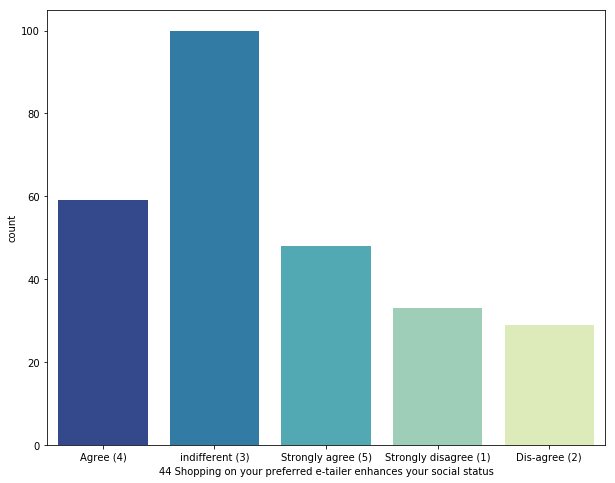

------------------------------------------------------------------------------------------------------------------------------------------------------
indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: 45 You feel gratification shopping on your favorite e-tailer, dtype: int64


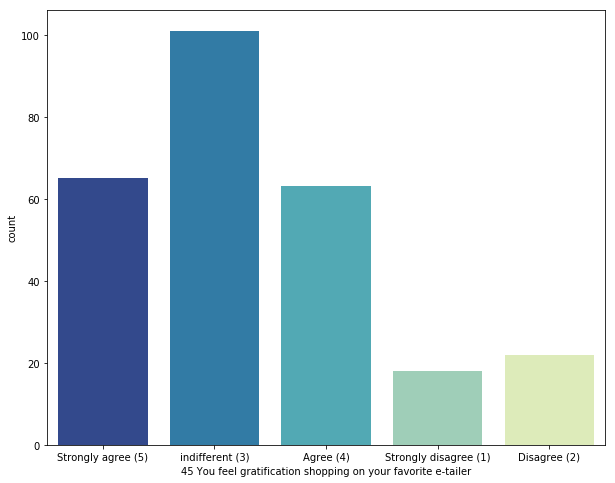

------------------------------------------------------------------------------------------------------------------------------------------------------
Agree (4)                88
indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: 46 Shopping on the website helps you fulfill certain roles, dtype: int64


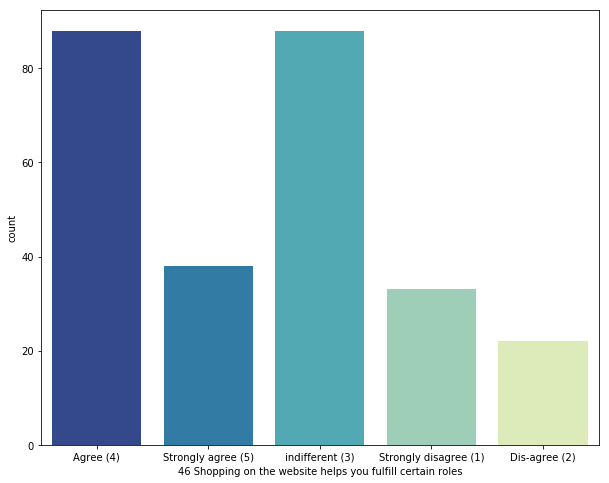

------------------------------------------------------------------------------------------------------------------------------------------------------
Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64


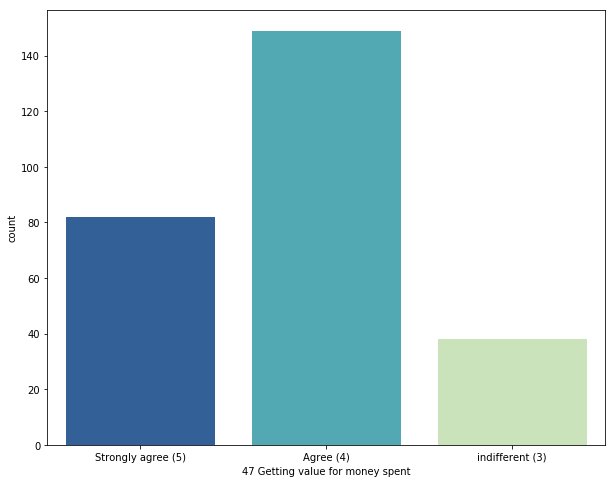

------------------------------------------------------------------------------------------------------------------------------------------------------


In [56]:
for col in dataset.iloc[:,17:47]:
    print(dataset[col].value_counts())
    plt.figure(figsize = (10,8))
    sns.countplot(x =dataset[col], palette = 'YlGnBu_r')
    plt.show()
    print('-----'*30)

## Conclusions we can draw from the above plot

1. More than 50% of the buyers strongly agree that the content on the website must be easy to read and understand
2. More the choices provided by websites for comparision, better the buyer experience, 116 buyers strongly agree and 92 buyers agree
3. Most of the buyers agree to the question that Information on the listed seller and the product being offered is important for purchase decision
4. Almost every one agrees to the fact that all relevant information on listed products must be stated clearly. which drives the purchase decision
5. More than 70% buyers votes for the easier website design and their navigation. precisely 141 strongly agree and 105 agree to this.
6. Further, the speed of the website is very important and more than 80% people agree to the same.
7. Almost 80% buyers agree that a website must have a user friendly interface
8. Close to 90% buyers agree that a e-commerce site should have convenient payment methods
9. Almost 70% buyers depend on trust that online retail store will fulfill its part of the transaction at the stipulated time.
10. Even though the e-commerce sites should provide better content , easier navigation, convenient payment method so and so. It should also have better customer service for its customers and 194 buyer strongly agree to this.
11. No one disagrees to the security factor, buyers feel that the e-commerce sites should provide privacy to its customers
12. Availablility of more options in communication channels for customer support is very important and most of the buyers agree to it
13. 190 buyers agree that the online shopping gives more monetary benefits and discounts, 50 buyers were neutral about this statement and  28 buyers dis agree to this statement
14. Most of the buyers agrees to the fact that shopping online is convenient and flexible, more than 50% buyers agree to this statement
15. Almost everyone agrees to the fact that return and replacement policy of the seller is very important in making a purchase decision
16. One of the benefit of shopping online is gaining access to its loyalty program and 50% of the buyers agree to this fact.
17. None of the buyers dis-agree to the fact that quality information on the website improves customer satisfaction
18. Also almost every one agrees to the fact that a good quality websites imporoves customer satisfaction
19. Almost every one agrees to the fact that trust is the key player in user satisfaction
20. Monetary savings is also a key player along with many other factors, where in more than 70% buyers agree to it
21. Further no one disagrees for getting value for the money spent. Everyone prefers to get value for the money they spend on e-commerce websites

### Finally We can say that below are the major factors that buyer's prefer in a e-commerce website:

1. Easy to read and understandadable content
2. Information on the Seller
3. Relevent information on all the products
4. Easier website design and navigation
5. User friendly Interface
6. Convenience in payment methods
7. Trust and On time delivery.
8. Better Customer Service
9. Secure and offers complete privacy to their customers
10. Discounts and Monetary Benefits
11. Wide range of options and product selections
12. Flexibility in their offers and services
13. Return and Replacement policies
14. Quality information on websites
15. Website Quality
16. Value for the money spent

### let's see the distribution of which website the buyer will resommend to their friends

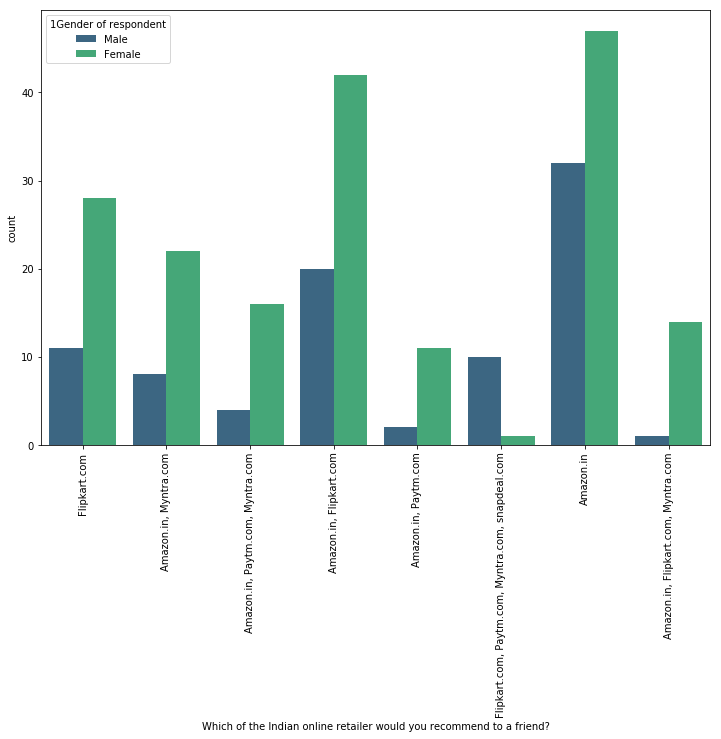

In [58]:
plt.figure(figsize = (12,8))
sns.countplot(x = dataset['Which of the Indian online retailer would you recommend to a friend?'], palette = 'viridis', hue = dataset['1Gender of respondent'])
plt.xticks(rotation = 90)
plt.show()

### Conclusion:

From the above plot the larger number of customers (male/female) recommend Amazon.in and Flipkart.com to a friend. Which is the sign that this website contains the major factor that buyer's prefer in a e-commerce website. 

### Let's analyse whether these websites satisfy every aspect of the buyer's expectaion,  using this information we can say which company has the highest retention rates and which doesn't

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64


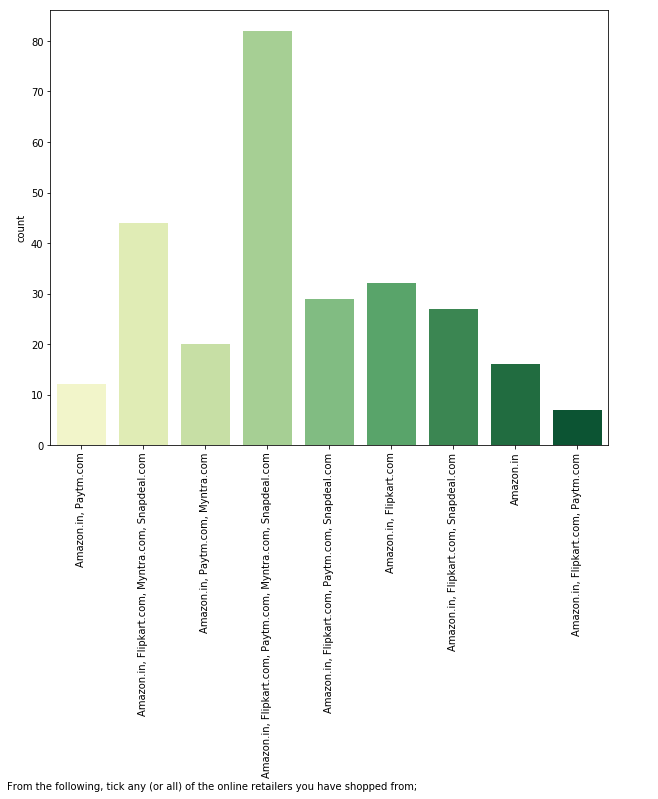

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64


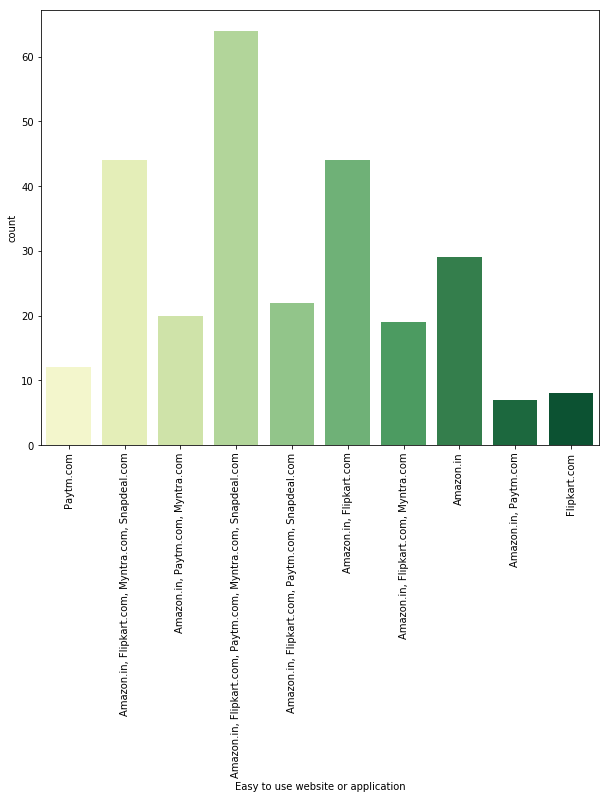

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64


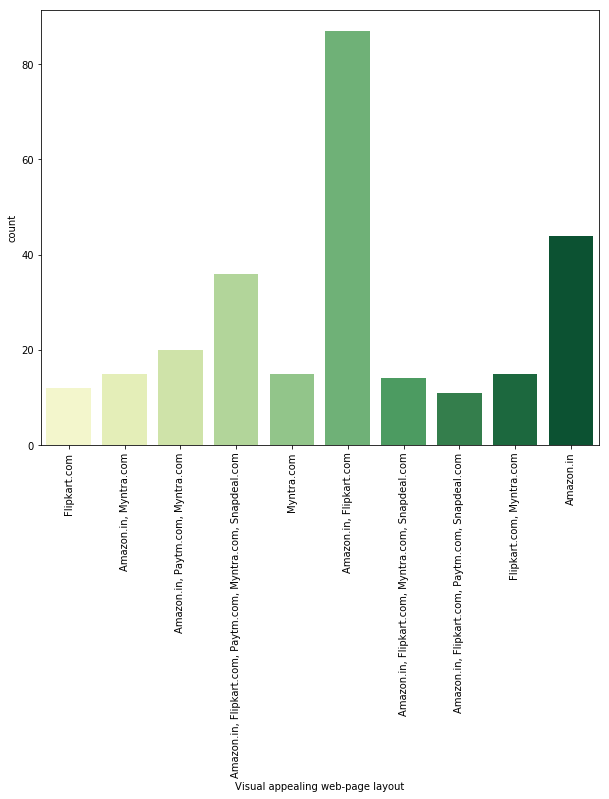

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64


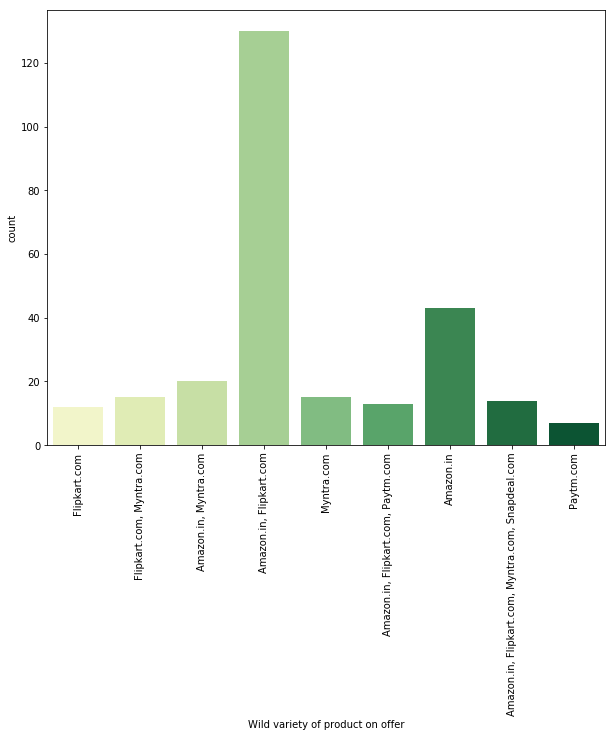

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64


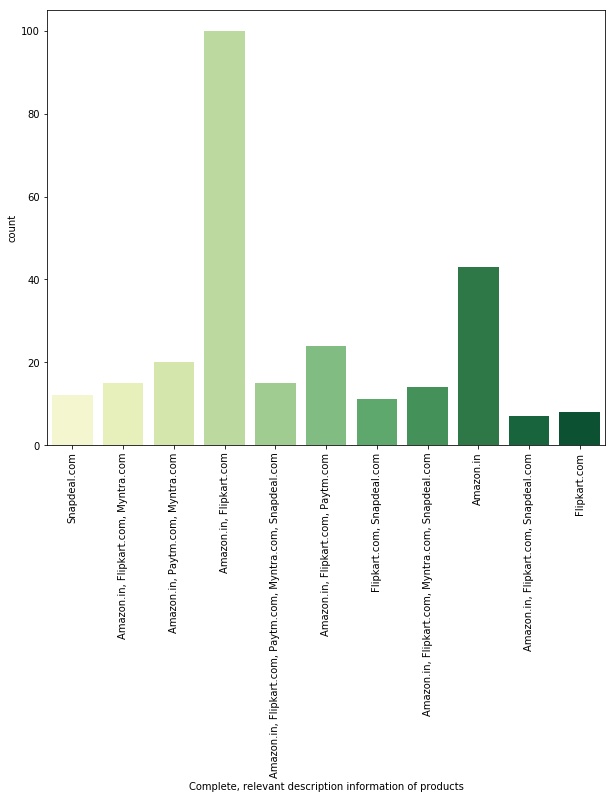

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64


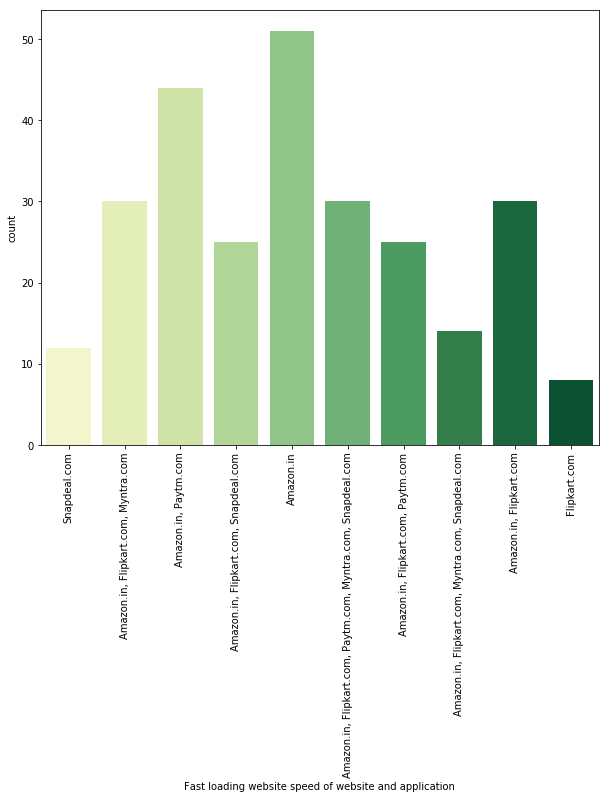

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64


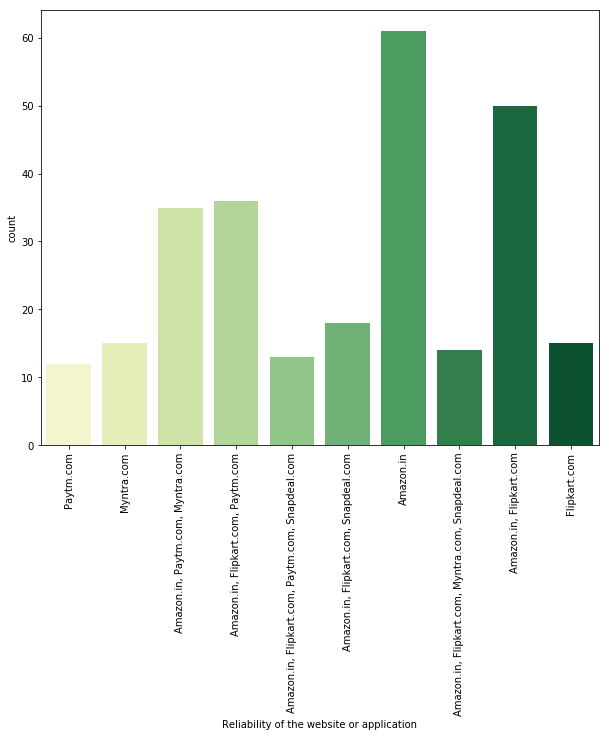

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64


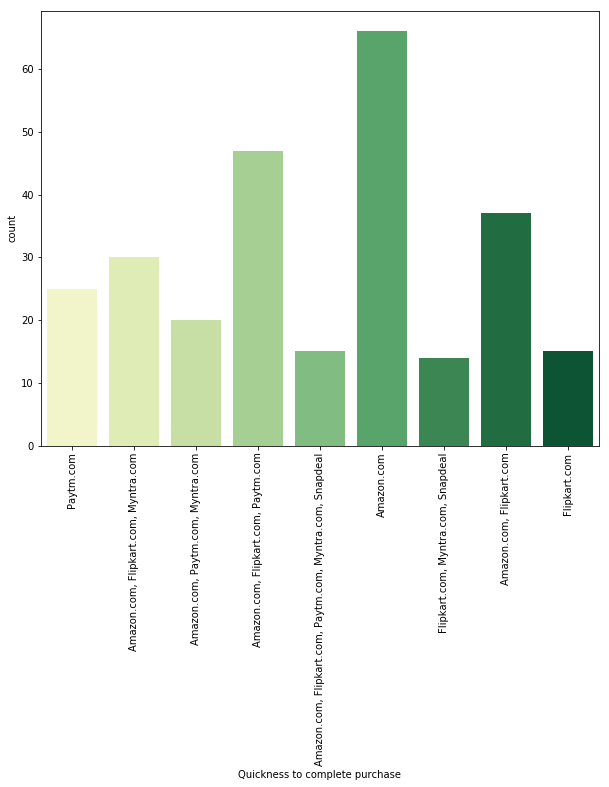

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64


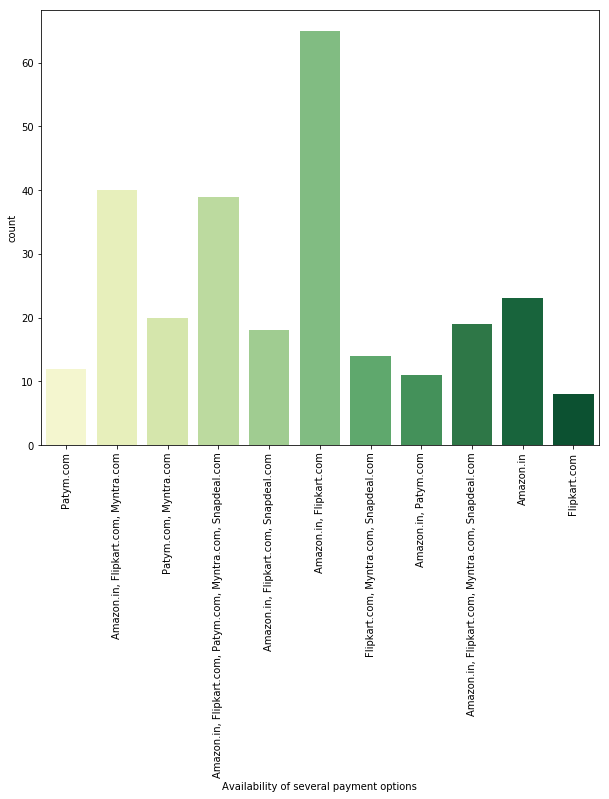

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery , dtype: int64


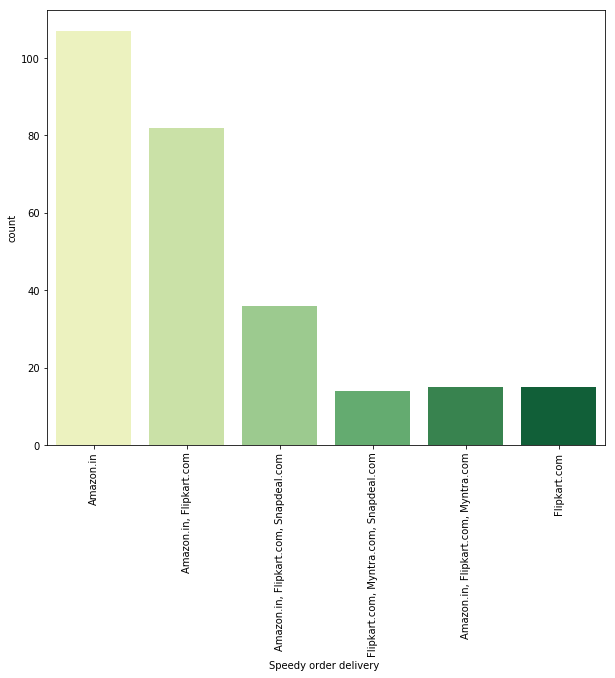

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64


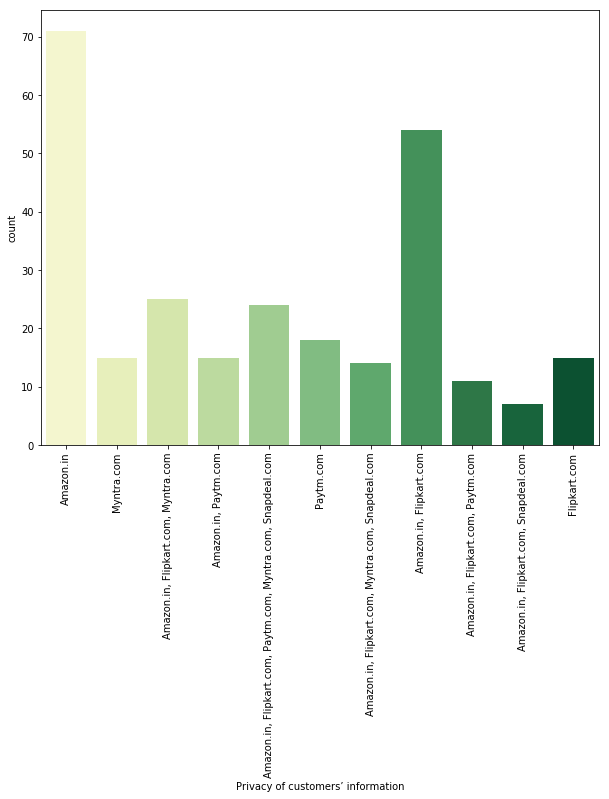

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64


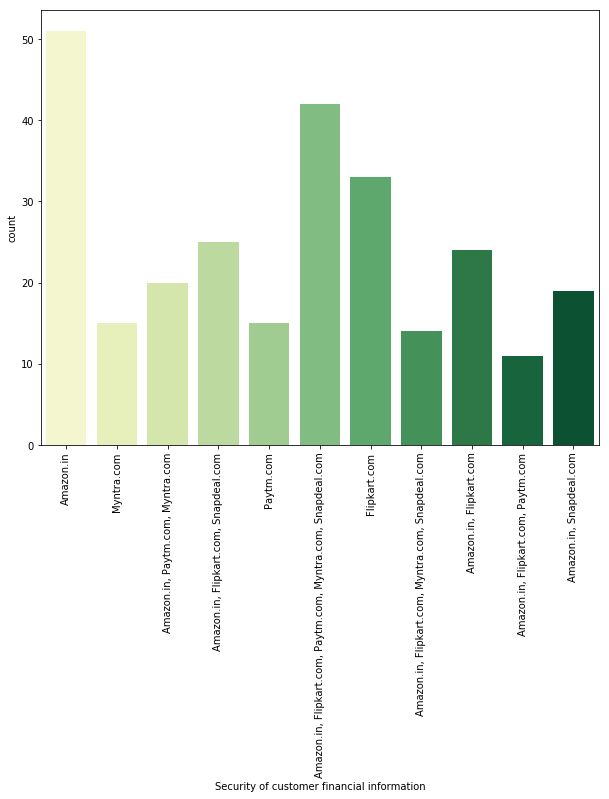

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64


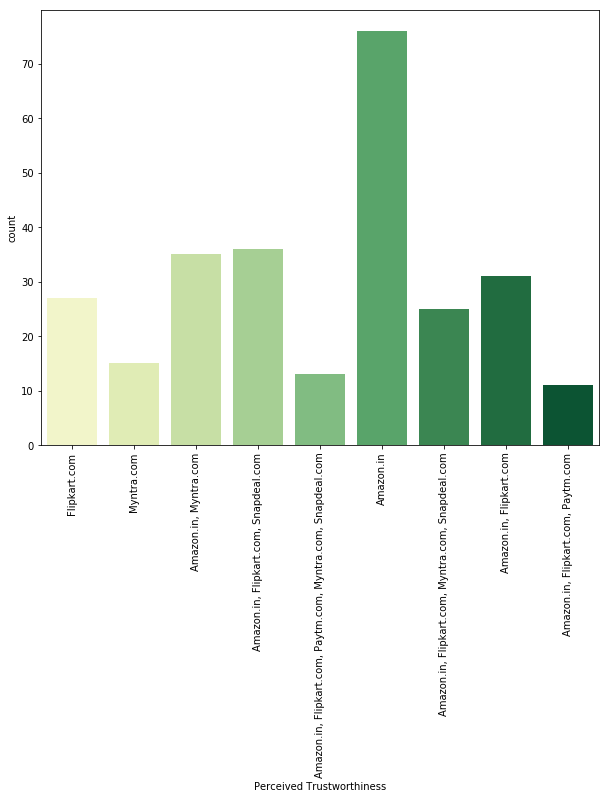

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64


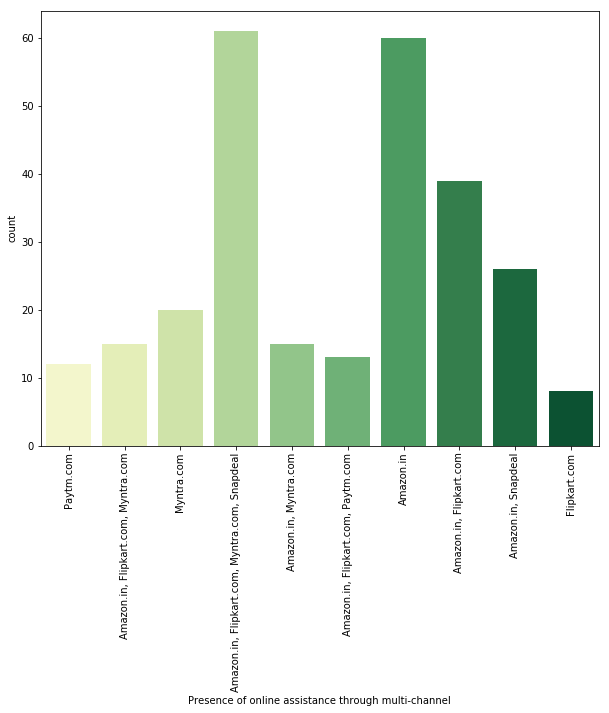

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64


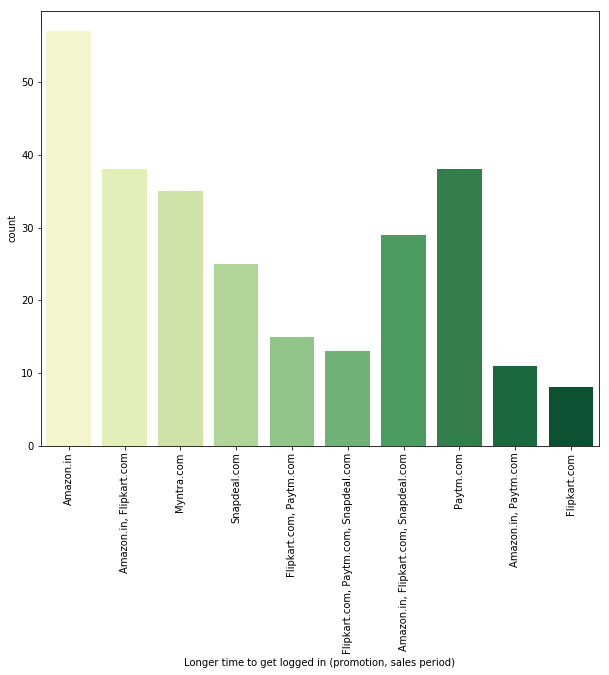

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64


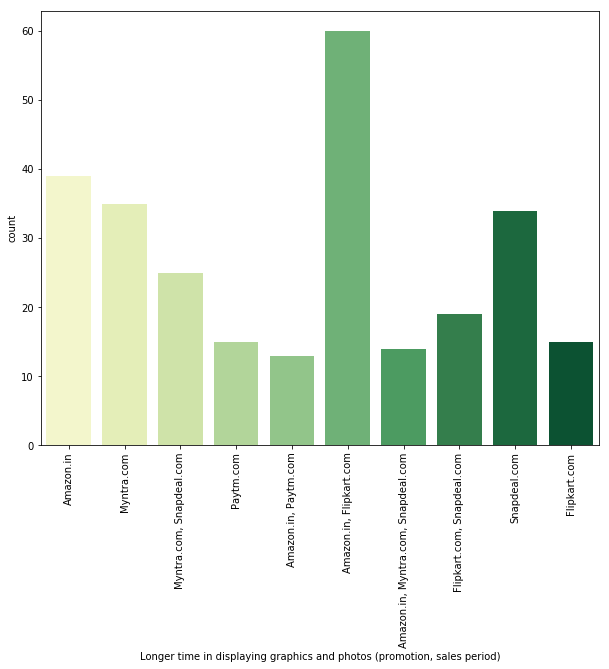

------------------------------------------------------------------------------------------------------------------------------------------------------
Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64


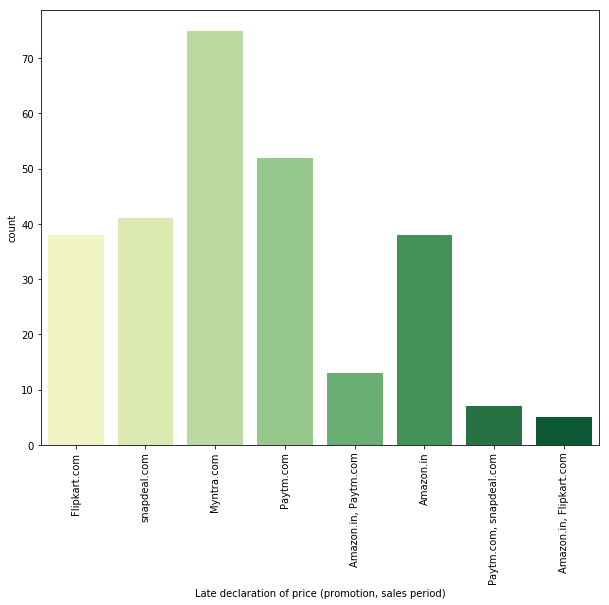

------------------------------------------------------------------------------------------------------------------------------------------------------
Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64


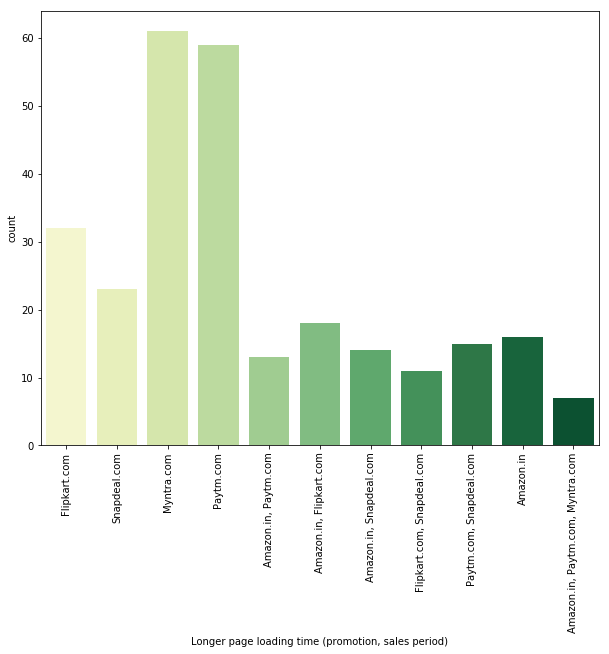

------------------------------------------------------------------------------------------------------------------------------------------------------
Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64


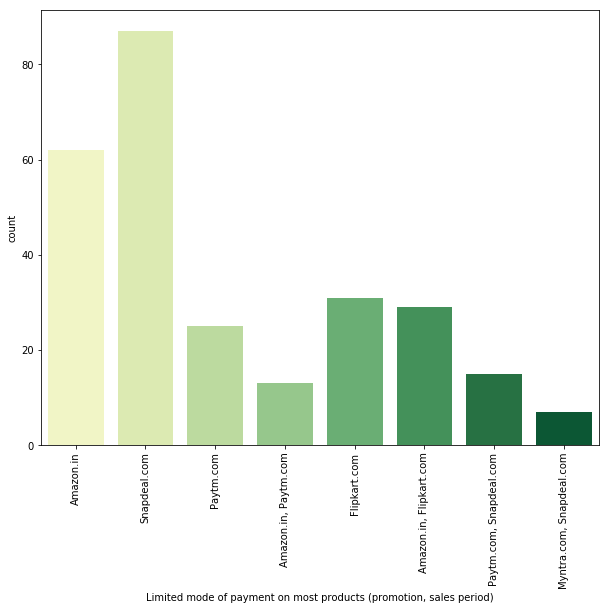

------------------------------------------------------------------------------------------------------------------------------------------------------
Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer delivery period, dtype: int64


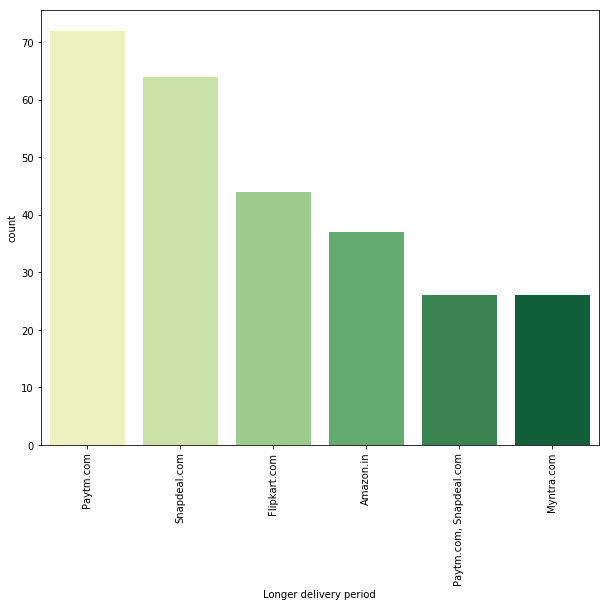

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64


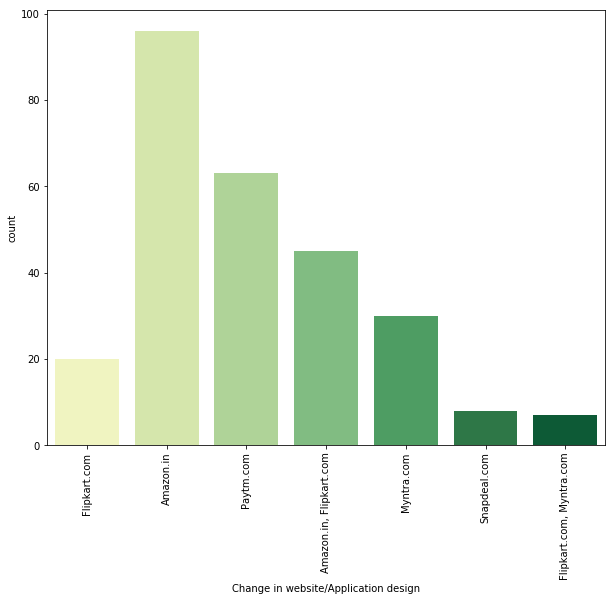

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64


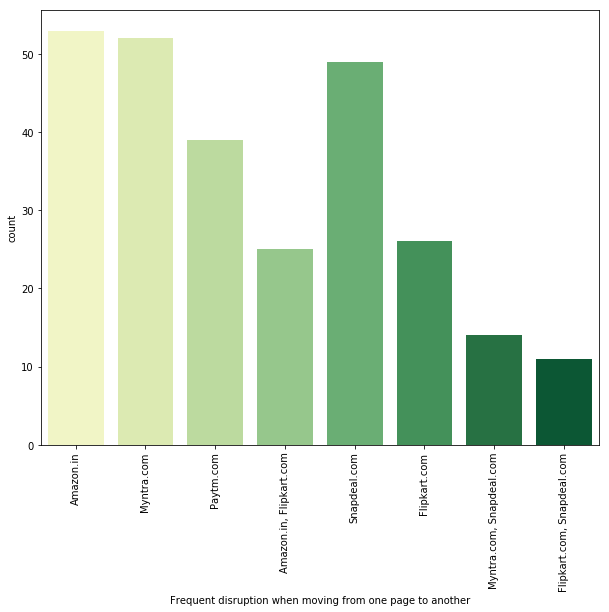

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64


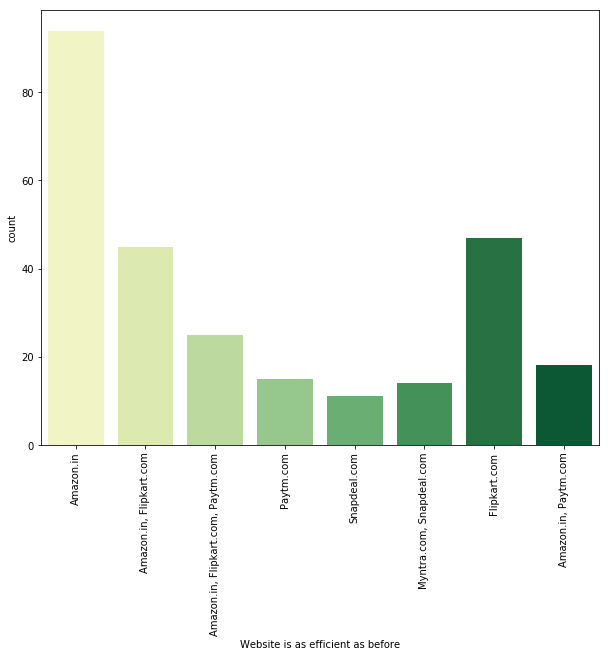

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


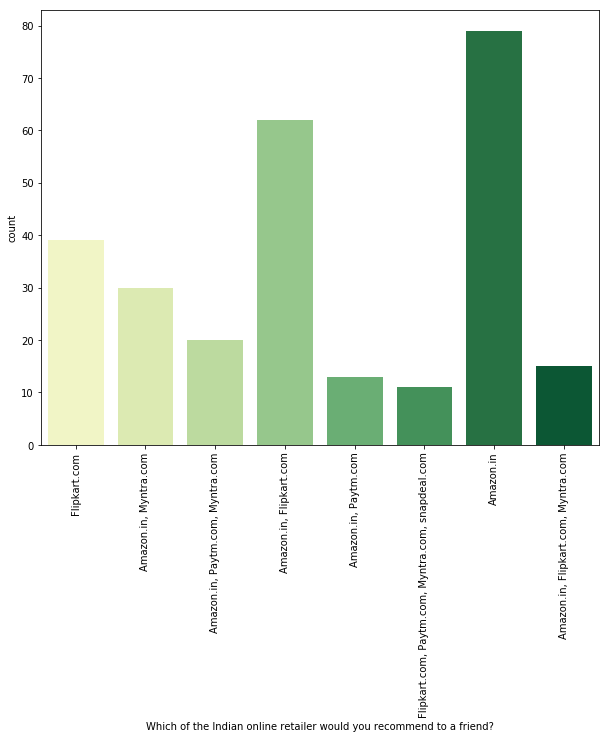

------------------------------------------------------------------------------------------------------------------------------------------------------


In [60]:
for col in dataset.iloc[:,47:]:
    print(dataset[col].value_counts())
    plt.figure(figsize = (10,8))
    sns.countplot(x =dataset[col], palette = 'YlGn')
    plt.xticks(rotation = 90)
    plt.show()
    print('-----'*30)

### Findings:

1. Most of the buyers have purchased from Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com and everyone has shopped from Amazon.in. The next majority with the categories would be flipkart.

2. Again, almost every website is easy to use according to buyers, when it comes to visually most appealing websites Amazon.in and Flipkart.com tops the list

3. When it comes to wild variety of products on offer, Complete relevant description information, Fast loading website/application, Reliablility, Interface, Availability of payment options,faster delivery, customer privacy, security, Trustworthiness, Customer support through multiple channels, time spent on a website, Website and application design updates  and websites recommended to a friend most people voted for Amazon.in and Flipkart.com

* This above positives are a very good sign because as per the previous analysis on what people prefer for in a e-commerce website has been covered by Amazon and Flipkart and they can expect a higher retention rates when compared to other websites.

4. However, when we see analyse factors such as Late declaration of price and Longer page loading time Myntra and paytm tops the list and this promoting  a bad buyer experience.

5. Further, when it comes to Limited mode of payment on most products Snapdeal tops the list followed by Amazon. Here is the only place Amazon needs to improve as we can see from the customer preferences, more options on payment mode is required.

6. When it comes to longer delivery period, Paytm and Snapdeal tops the list which is not in line with the customer expectations.

7. When it comes to frequent disruptions, Amazon, myntra and Snapdeal tops the list.

## Conclusion:

From the above analysis, I can say that the companies with highest retention and customer satisfaction rates are Amazon.in and Flipkart.com because their positives are line line with the buyer preferences and they are most likely to use this websites for purchases in future.

The company with moderate retention rate is Myntra.com

Further, the company with very low retention rate and customer satisfaction is with Paytm and Snapdeal because most of the factors are not in line with the customer preferences and they are less likely to use this website again for online purchases.

Customer satisfaction plays a major role in retention, A company should first understand what customers expects while purchasing online (e-commerce) and build a better buying experience which will inturn retain the customer. An unforgettable experience is what drivers customers to buy again and again.

The main factors that drives customer satisfaction are.

1. Easy to read and understandadable content
2. Relevent information on all the products
3. Easier website design and navigation
4. User friendly Interface
5. Convenience in payment methods
6. Trust and On time delivery.
7. Better Customer Service
8. Secure and offers complete privacy to their customers
9. Discounts and Monetary Benefits
10. Wide range of options and product selections
11. Flexibility in their offers and services
12. Return and Replacement policies
13. Quality information on websites
14. Website Quality
15. Value for the money spent


### Let's test the same. One of the hypothesis is that '22 Ease of navigation in website' is dependent on the 'Which of the Indian online retailer would you recommend to a friend?'

#### Using chi2 test. The null hypothesis H0 is that the Ease to navigate website is independent of the buyers recommending the e-commerce site to a friend

In [61]:
from scipy.stats import chi2_contingency

In [63]:
cross = pd.crosstab(index = dataset['22 Ease of navigation in website'], columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
22 Ease of navigation in website,,,,,,,,
Agree (4),40,7,0,15,0,20,12,11
Dis-agree (2),5,0,0,0,0,0,0,0
Strongly agree (5),16,55,15,15,13,0,27,0
Strongly disagree (1),18,0,0,0,0,0,0,0


In [65]:
actual_values = cross.values
print('The actual values are',actual_values)

The actual values are [[40  7  0 15  0 20 12 11]
 [ 5  0  0  0  0  0  0  0]
 [16 55 15 15 13  0 27  0]
 [18  0  0  0  0  0  0  0]]


In [67]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

p value is 4.3875333226283436e-26
Dependent (reject H0)


### Conclusion is that the Easier website design and navigation improves the retention rate

### Checking the 2nd hypothesis that 'User friendly Interface of the website' drives the recommendation of  a website to a friend

#### The Null hypthesis H0 is that both the above features are independent

In [68]:
cross1 = pd.crosstab(index = dataset['24 User friendly Interface of the website'],columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross1

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
24 User friendly Interface of the website,,,,,,,,
Agree (4),34,0,0,0,0,0,0,11
Dis-agree (2),0,0,0,0,0,0,12,0
Indifferent (3),5,0,0,0,0,0,0,0
Strongly agree (5),22,62,15,30,13,20,27,0
Strongly disagree (1),18,0,0,0,0,0,0,0


In [69]:
actual_values = cross1.values
print('The actual values are', actual_values)

The actual values are [[34  0  0  0  0  0  0 11]
 [ 0  0  0  0  0  0 12  0]
 [ 5  0  0  0  0  0  0  0]
 [22 62 15 30 13 20 27  0]
 [18  0  0  0  0  0  0  0]]


In [70]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

p value is 2.325066084016344e-43
Dependent (reject H0)


### Conclusion is that the User friendly Interface of the website and navigation improves the retention rate.

### As per our analysis, let's find out whether if the content on the website must be easy to read and understand if the buyer recommends a website to a friend.

#### Here the null hypothesis would be that the content on the website doesn't driver the recommendation to a friend

In [71]:
cross2 = pd.crosstab(index = dataset['18 The content on the website must be easy to read and understand'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross2

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
18 The content on the website must be easy to read and understand,,,,,,,,
Agree (4),13,25,0,0,0,0,31,11
Indifferent (3),7,0,0,0,0,0,0,0
Strongly agree (5),41,37,15,30,13,20,8,0
Strongly disagree (1),18,0,0,0,0,0,0,0


In [72]:
actual_values = cross2.values
print('The actual values are', actual_values)

The actual values are [[13 25  0  0  0  0 31 11]
 [ 7  0  0  0  0  0  0  0]
 [41 37 15 30 13 20  8  0]
 [18  0  0  0  0  0  0  0]]


In [73]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

p value is 5.05624278617153e-27
Dependent (reject H0)


### Conclusion is that the website must be easy to read and understand which improves the retention rate.

### As per our analysis, let's find out whether all relevant information on listed products must be stated clearly if the buyer recommends a website to a friend.

#### Here the null hypothesis would be that the relevant information on the website doesn't drive the recommendation to a friend

In [74]:
cross3 = pd.crosstab(index = dataset['21 All relevant information on listed products must be stated clearly'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross3

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
21 All relevant information on listed products must be stated clearly,,,,,,,,
Agree (4),30,25,0,15,0,20,31,11
Dis-agree (2),12,0,0,0,0,0,0,0
Strongly agree (5),19,37,15,15,13,0,8,0
Strongly disagree (1),18,0,0,0,0,0,0,0


In [76]:
actual_values = cross3.values
print('The actual values are', actual_values)

The actual values are [[30 25  0 15  0 20 31 11]
 [12  0  0  0  0  0  0  0]
 [19 37 15 15 13  0  8  0]
 [18  0  0  0  0  0  0  0]]


In [77]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

p value is 1.551226068563992e-24
Dependent (reject H0)


### Conclusion is that the website must be all relevant information on listed products must be stated clearly​, which improves the retention rate.

### 25 Convenient Payment methods is dependent on whether the buyer recommends a website to a friend.

#### Here the null hypothesis H0 would be that Convenient Payment methods doesn't drive the recommendation to a friend

In [78]:
cross4 = pd.crosstab(index = dataset['25 Convenient Payment methods'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross4

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
25 Convenient Payment methods,,,,,,,,
Agree (4),31,19,0,0,0,0,19,11
Dis-agree (2),18,0,0,0,0,0,12,0
Strongly agree (5),30,43,15,30,13,20,8,0


In [79]:
actual_values = cross4.values
print('The actual values are', actual_values)

The actual values are [[31 19  0  0  0  0 19 11]
 [18  0  0  0  0  0 12  0]
 [30 43 15 30 13 20  8  0]]


In [80]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 1.1289206383365814e-21
Dependent (reject H0)


### Conclusion is that convenient Payment methods, improves the retention rate.

### 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time is dependent on whether the buyer recommends a website to a friend.

#### Here the H0 would be that tha Trust is independent of whether the buyer recommends a website to a friend

In [81]:
cross5 = pd.crosstab(index = dataset['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross5

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,,,,,,,,
Agree (4),16,44,0,15,0,0,0,11
Disagree (2),18,0,0,0,0,0,12,0
Strongly agree (5),40,11,15,15,13,20,27,0
indifferent (3),5,7,0,0,0,0,0,0


In [82]:
actual_values = cross5.values
print('The actual values are', actual_values)

The actual values are [[16 44  0 15  0  0  0 11]
 [18  0  0  0  0  0 12  0]
 [40 11 15 15 13 20 27  0]
 [ 5  7  0  0  0  0  0  0]]


In [83]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 2.456552667959137e-26
Dependent (reject H0)


### Conclusion is that Trust and On time delivery, improves the retention rate.

### 27 Empathy (readiness to assist with queries) towards the customers is dependent on whether the buyer recommends a website to a friend.

#### Here the H0 would be that that Empathy towards customers is independent of whether the buyer recommends a website to a friend

In [84]:
cross6 = pd.crosstab(index = dataset['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross6

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,,,,,,,,
Agree (4),16,44,0,15,0,0,0,11
Disagree (2),18,0,0,0,0,0,12,0
Strongly agree (5),40,11,15,15,13,20,27,0
indifferent (3),5,7,0,0,0,0,0,0


In [88]:
actual_values = cross6.values
print('The actual values are', actual_values)

The actual values are [[16 44  0 15  0  0  0 11]
 [18  0  0  0  0  0 12  0]
 [40 11 15 15 13 20 27  0]
 [ 5  7  0  0  0  0  0  0]]


In [89]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 2.456552667959137e-26
Dependent (reject H0)


### Conclusion is that Empathy towards customers and On time delivery, improves the retention rate.

### Being able to guarantee the privacy of the customer is dependent on whether the buyer recommends a website to a friend.

#### Here the H0 would be that that providing guarentee to the privacy of the customer is independent of whether the buyer recommends a website to a friend

In [87]:
cross7 = pd.crosstab(index = dataset['28 Being able to guarantee the privacy of the customer'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross7

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
28 Being able to guarantee the privacy of the customer,,,,,,,,
Agree (4),13,7,0,15,0,0,12,11
Strongly agree (5),40,55,15,15,13,20,27,0
indifferent (3),26,0,0,0,0,0,0,0


In [90]:
actual_values = cross7.values
print('The actual values are', actual_values)

The actual values are [[13  7  0 15  0  0 12 11]
 [40 55 15 15 13 20 27  0]
 [26  0  0  0  0  0  0  0]]


In [91]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 9.802403544226331e-24
Dependent (reject H0)


### Conclusion is that Being able to guarantee the privacy of the customer, improves the retention rate.

### Online shopping gives monetary benefit and discounts is dependent on whether the buyer recommends a website to a friend.

#### Here the H0 would be that that monetary benefit and discounts is independent of whether the buyer recommends a website to a friend

In [93]:
cross8 = pd.crosstab(index = dataset['30 Online shopping gives monetary benefit and discounts'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross8

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
30 Online shopping gives monetary benefit and discounts,,,,,,,,
Agree (4),8,32,15,0,0,0,19,11
Dis-agree (2),11,0,0,0,0,0,0,0
Strongly agree (5),34,0,0,30,13,20,8,0
Strongly disagree (1),18,0,0,0,0,0,0,0
indifferent (3),8,30,0,0,0,0,12,0


In [94]:
actual_values = cross8.values
print('The actual values are', actual_values)

The actual values are [[ 8 32 15  0  0  0 19 11]
 [11  0  0  0  0  0  0  0]
 [34  0  0 30 13 20  8  0]
 [18  0  0  0  0  0  0  0]
 [ 8 30  0  0  0  0 12  0]]


In [95]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 1.1984260307511734e-47
Dependent (reject H0)


### Conclusion that monetary benefit and discounts, improves the retention rate.

### Shopping online is convenient and flexible is dependent on whether the buyer recommends a website to a friend.

#### Here the H0 would be that that convenience and flexiblity is independent of whether the buyer recommends a website to a friend

In [96]:
cross9 = pd.crosstab(index = dataset['32 Shopping online is convenient and flexible'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross9

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
32 Shopping online is convenient and flexible,,,,,,,,
Agree (4),26,7,15,0,0,0,19,11
Dis-agree (2),0,0,0,0,0,0,12,0
Strongly agree (5),45,30,0,30,13,20,8,0
indifferent (3),8,25,0,0,0,0,0,0


In [97]:
actual_values = cross9.values
print('The actual values are', actual_values)

The actual values are [[26  7 15  0  0  0 19 11]
 [ 0  0  0  0  0  0 12  0]
 [45 30  0 30 13 20  8  0]
 [ 8 25  0  0  0  0  0  0]]


In [98]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 5.312646015119923e-41
Dependent (reject H0)


### Conclusion that convenience and flexiblity, improves the retention rate.

### Return and replacement policy of the e-tailer is important for purchase decision and is dependent on whether the buyer recommends a website to a friend.

#### Here the H0 would be that that  Return and replacement policy of the e-tailer is independent of whether the buyer recommends a website to a friend

In [99]:
cross10 = pd.crosstab(index = dataset['33 Return and replacement policy of the e-tailer is important for purchase decision'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross10

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
33 Return and replacement policy of the e-tailer is important for purchase decision,,,,,,,,
Agree (4),19,32,0,0,0,0,0,0
Dis-agree (2),8,0,0,0,0,0,12,0
Strongly agree (5),52,30,15,30,13,20,27,11


In [100]:
actual_values = cross10.values
print('The actual values are', actual_values)

The actual values are [[19 32  0  0  0  0  0  0]
 [ 8  0  0  0  0  0 12  0]
 [52 30 15 30 13 20 27 11]]


In [101]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 5.198073598638144e-18
Dependent (reject H0)


### Conclusion that Return and replacement policy of the e-tailer, improves the retention rate.

### Displaying quality Information on the website improves satisfaction of customers and is dependent on whether the buyer recommends a website to a friend.

#### Here the H0 would be that that Displaying quality Information on the website is independent of whether the buyer recommends a website to a friend

In [102]:
cross11 = pd.crosstab(index = dataset['35 Displaying quality Information on the website improves satisfaction of customers'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross11

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
35 Displaying quality Information on the website improves satisfaction of customers,,,,,,,,
Agree (4),28,7,0,15,0,0,19,11
Strongly agree (5),32,30,15,15,13,20,8,0
indifferent (3),19,25,0,0,0,0,12,0


In [103]:
actual_values = cross11.values
print('The actual values are', actual_values)

The actual values are [[28  7  0 15  0  0 19 11]
 [32 30 15 15 13 20  8  0]
 [19 25  0  0  0  0 12  0]]


In [104]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 7.4850711015500295e-19
Dependent (reject H0)


### Conclusion that displaying quality Information on the website improves satisfaction of customers and improves the retention rate.

### good quality website or application is dependent on whether the buyer recommends a website to a friend.

#### Here the H0 would be that that good quality website or application is independent of whether the buyer recommends a website to a friend

In [105]:
cross12 = pd.crosstab(index = dataset['36 User derive satisfaction while shopping on a good quality website or application'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross12

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
36 User derive satisfaction while shopping on a good quality website or application,,,,,,,,
Agree (4),24,32,0,0,0,0,19,11
Dis-agree (2),8,0,0,0,0,0,0,0
Strongly agree (5),47,30,15,30,13,20,20,0


In [106]:
actual_values = cross12.values
print('The actual values are', actual_values)

The actual values are [[24 32  0  0  0  0 19 11]
 [ 8  0  0  0  0  0  0  0]
 [47 30 15 30 13 20 20  0]]


In [107]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 1.757885674456074e-14
Dependent (reject H0)


### Conclusion that good quality website or application improves the retention rate.

### Getting value for money spent is dependent on whether the buyer recommends a website to a friend.

#### Here the H0 would be that that Getting value for money spent is independent of whether the buyer recommends a website to a friend

In [108]:
cross13 = pd.crosstab(index = dataset['47 Getting value for money spent'],
                    columns = dataset['Which of the Indian online retailer would you recommend to a friend?'])
cross13

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
47 Getting value for money spent,,,,,,,,
Agree (4),33,51,15,0,0,20,19,11
Strongly agree (5),8,11,0,30,13,0,20,0
indifferent (3),38,0,0,0,0,0,0,0


In [109]:
actual_values = cross13.values
print('The actual values are', actual_values)

The actual values are [[33 51 15  0  0 20 19 11]
 [ 8 11  0 30 13  0 20  0]
 [38  0  0  0  0  0  0  0]]


In [110]:
stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 3.860016246898221e-44
Dependent (reject H0)


### Conclusion that Getting value for money spent improves the retention rate.

## Here we have verified that the major factors contributing for customer retention are dependent on website recommendation to a friend.

### If a buyer recommends a website to a buyer, which means he is using that website and found all the above benefits and its highly likely that the customer will buy from that website again